[데이터 출처](https://archive.ics.uci.edu/ml/datasets/Indoor+User+Movement+Prediction+from+RSS+data)

### <div style="text-align: right">파이썬을 이용한 딥러닝 기말 프로젝트 (2019220082 최효정) </div>




# 실제 사무실 환경의 사용자 이동 패턴예측


## Data description




1. input data는 앵커 4개와 사용자가 착용한 1개의 센서 간의 무선 신호 강도(RSS)로 구성   


2. 8Hz(초당 8개 샘플)의 주파수에서 사용자가 이동하는 동안 데이터가 수집, 제공된 데이터 집합에서 RSS 신호는 [-1,1] 간격으로 재조정 됨



3. target data (1: 위치 이동) , (-1: 위치 보존) 
  
  
4. groups : 3가지 환경 설정

## Dataset information

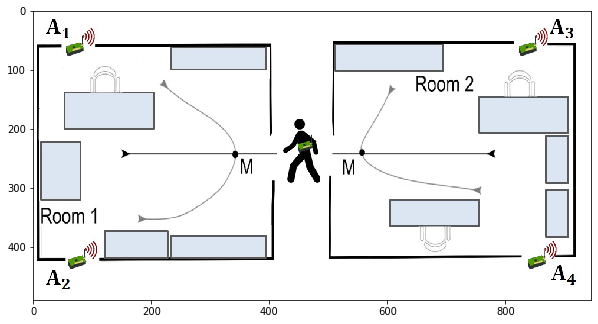

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
 
img = imread('./data/MovementAAL.jpg') # 이미지 읽어오기
plt.figure(figsize=(10,20))
plt.imshow(img)
plt.show()


 

- 두 개의 방에 네 개의 동작 센서(A1, A2, A3, A4)가 배치되어 있다. 이 두 방의 설정은 세 쌍의 서로 다른 방들(그룹1, 그룹2, 그룹3)에서 만들어졌다.  


- 사람은 위의 이미지에 표시된 여섯 가지 미리 정의된 경로 중 하나를 따라 이동할 수 있다. 사람이 2, 3, 4, 6번 길을 걸으면 방 안에서 움직인다. 반면 1번 길이나 5번 길을 따라가다 보면 방 사이를 이동했다고 볼 수 있다.  

 
- **센서 판독치는 주어진 시점에서 사람의 위치를 식별하는 데 사용할 수 있다. 사람이 방 안이나 방을 가로질러 움직이면 센서의 판독값이 변한다. 이러한 변화는 그 사람의 경로를 파악하는 데 이용될 수 있다.**

## Goals



여러 개의 모션 센서를 서로 다른 방에 배치하고, 이러한 모션 센서로부터 포착된 주파수 데이터를 바탕으로 개인이 방을 가로질러 이동했는지를 확인하는 것  
 

## 필요한 모듈을 import 해준다

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir

In [3]:
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

## dataset example

In [4]:
df1 = pd.read_csv('./data/dataset/MovementAAL_RSS_1.csv')
df2 = pd.read_csv('./data/dataset/MovementAAL_RSS_2.csv')

In [5]:
df1.head()

,#RSS_anchor1,RSS_anchor2,RSS_anchor3,RSS_anchor4
0,-0.90476,-0.48,0.28571,0.30
1,-0.57143,-0.32,0.14286,0.30
2,-0.38095,-0.28,-0.14286,0.35
3,-0.28571,-0.20,-0.47619,0.35
4,-0.14286,-0.20,0.14286,-0.20


In [6]:
df2.head()

,#RSS_anchor1,RSS_anchor2,RSS_anchor3,RSS_anchor4
0,-0.57143,-0.20,0.71429,0.50
1,-0.76190,-0.48,0.76190,-0.25
2,-0.85714,-0.60,0.85714,0.55
3,-0.76190,-0.40,0.71429,0.60
4,-0.76190,-0.84,0.85714,0.45


In [7]:
df1.shape, df2.shape

((27, 4), (26, 4))

## 데이터들을 리스트로 불러온다

In [8]:
path = './data/dataset/MovementAAL_RSS_' # 데이터 경로
sequences = list()
for i in range(1,315): # 314개의 시퀀스 불러오기
    file_path = path + str(i) + '.csv'
    print(file_path)
    df = pd.read_csv(file_path, header=0)
    values = df.values
    sequences.append(values)

./data/dataset/MovementAAL_RSS_1.csv
./data/dataset/MovementAAL_RSS_2.csv
./data/dataset/MovementAAL_RSS_3.csv
./data/dataset/MovementAAL_RSS_4.csv
./data/dataset/MovementAAL_RSS_5.csv
./data/dataset/MovementAAL_RSS_6.csv
./data/dataset/MovementAAL_RSS_7.csv
./data/dataset/MovementAAL_RSS_8.csv
./data/dataset/MovementAAL_RSS_9.csv
./data/dataset/MovementAAL_RSS_10.csv
./data/dataset/MovementAAL_RSS_11.csv
./data/dataset/MovementAAL_RSS_12.csv
./data/dataset/MovementAAL_RSS_13.csv
./data/dataset/MovementAAL_RSS_14.csv
./data/dataset/MovementAAL_RSS_15.csv
./data/dataset/MovementAAL_RSS_16.csv
./data/dataset/MovementAAL_RSS_17.csv
./data/dataset/MovementAAL_RSS_18.csv
./data/dataset/MovementAAL_RSS_19.csv
./data/dataset/MovementAAL_RSS_20.csv
./data/dataset/MovementAAL_RSS_21.csv
./data/dataset/MovementAAL_RSS_22.csv
./data/dataset/MovementAAL_RSS_23.csv
./data/dataset/MovementAAL_RSS_24.csv
./data/dataset/MovementAAL_RSS_25.csv
./data/dataset/MovementAAL_RSS_26.csv
./data/dataset/Moveme

./data/dataset/MovementAAL_RSS_222.csv
./data/dataset/MovementAAL_RSS_223.csv
./data/dataset/MovementAAL_RSS_224.csv
./data/dataset/MovementAAL_RSS_225.csv
./data/dataset/MovementAAL_RSS_226.csv
./data/dataset/MovementAAL_RSS_227.csv
./data/dataset/MovementAAL_RSS_228.csv
./data/dataset/MovementAAL_RSS_229.csv
./data/dataset/MovementAAL_RSS_230.csv
./data/dataset/MovementAAL_RSS_231.csv
./data/dataset/MovementAAL_RSS_232.csv
./data/dataset/MovementAAL_RSS_233.csv
./data/dataset/MovementAAL_RSS_234.csv
./data/dataset/MovementAAL_RSS_235.csv
./data/dataset/MovementAAL_RSS_236.csv
./data/dataset/MovementAAL_RSS_237.csv
./data/dataset/MovementAAL_RSS_238.csv
./data/dataset/MovementAAL_RSS_239.csv
./data/dataset/MovementAAL_RSS_240.csv
./data/dataset/MovementAAL_RSS_241.csv
./data/dataset/MovementAAL_RSS_242.csv
./data/dataset/MovementAAL_RSS_243.csv
./data/dataset/MovementAAL_RSS_244.csv
./data/dataset/MovementAAL_RSS_245.csv
./data/dataset/MovementAAL_RSS_246.csv
./data/dataset/MovementAA

## target : (1: 위치 이동) , (-1: 위치 보존)

In [9]:
targets = pd.read_csv('./data/dataset/MovementAAL_target.csv')
targets = targets.values[:,1] # 타겟값만 뽑아내기 

In [10]:
targets

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [11]:
targets.shape # 타겟의 shape

(314,)

## groups : 3가지의 다른 환경 설정

In [12]:
groups = pd.read_csv('./data/groups/MovementAAL_DatasetGroup.csv', header=0)

In [13]:
groups

,#sequence_ID,dataset_ID
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
309,310,3
310,311,3
311,312,3
312,313,3


In [14]:
groups = groups.values[:,1] # groups의 값만 뽑아내기

In [15]:
groups

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [16]:
groups.shape

(314,)

## 평균 42개의 행을 가진 csv 파일이 314개 있다.
### 314개의 input data는 각각 최대 129개, 최소 19개의 행을 가지고 있다.

In [17]:
len_sequences = []
for one_seq in sequences: 
    len_sequences.append(len(one_seq))# 314개의 시퀀스 길이들을 리스트로 만들어준다.
pd.Series(len_sequences).describe() # 시퀀스 길이들에 대한 요약통계를 나타낸다.

count    314.000000
mean      42.028662
std       16.185303
min       19.000000
25%       26.000000
50%       41.000000
75%       56.000000
max      129.000000
dtype: float64

In [18]:
len_sequences # 314개의 시퀀스 길이들

[27,
 26,
 23,
 23,
 25,
 27,
 26,
 26,
 25,
 25,
 24,
 24,
 24,
 23,
 26,
 24,
 26,
 25,
 26,
 24,
 26,
 23,
 27,
 28,
 24,
 26,
 29,
 29,
 25,
 30,
 27,
 29,
 23,
 25,
 27,
 26,
 26,
 26,
 29,
 27,
 27,
 26,
 27,
 28,
 32,
 25,
 26,
 31,
 26,
 29,
 27,
 26,
 30,
 21,
 20,
 23,
 20,
 20,
 23,
 24,
 20,
 27,
 23,
 21,
 22,
 25,
 23,
 27,
 22,
 24,
 24,
 24,
 27,
 25,
 28,
 23,
 24,
 23,
 23,
 24,
 25,
 26,
 24,
 26,
 25,
 24,
 22,
 23,
 26,
 24,
 26,
 22,
 22,
 21,
 19,
 22,
 23,
 20,
 20,
 22,
 20,
 23,
 20,
 22,
 56,
 55,
 54,
 54,
 56,
 55,
 56,
 55,
 59,
 103,
 51,
 50,
 54,
 50,
 56,
 52,
 56,
 56,
 54,
 58,
 56,
 53,
 47,
 56,
 51,
 52,
 74,
 34,
 35,
 37,
 36,
 39,
 37,
 43,
 41,
 35,
 35,
 35,
 36,
 40,
 41,
 39,
 41,
 41,
 40,
 39,
 42,
 43,
 54,
 37,
 42,
 39,
 40,
 41,
 66,
 49,
 42,
 41,
 40,
 42,
 41,
 48,
 45,
 38,
 41,
 38,
 54,
 55,
 56,
 60,
 61,
 51,
 60,
 60,
 60,
 59,
 51,
 52,
 57,
 57,
 57,
 57,
 53,
 57,
 55,
 59,
 55,
 57,
 56,
 61,
 51,
 52,
 119,
 39,
 39,
 41

### 각 sequence를 최대 길이인 129로 패딩해준다
#### 마지막 행을 반복해주는 방법 (각 시퀀스에서 마지막 시점 데이터를 반복해주는것)

In [20]:
#Padding the sequence with the values in last row to max length
to_pad = 129
new_seq = []
for one_seq in sequences:
    len_one_seq = len(one_seq)
    last_val = one_seq[-1]
    n = to_pad - len_one_seq
   
    to_concat = np.repeat(one_seq[-1], n).reshape(4, n).transpose()
    new_one_seq = np.concatenate([one_seq, to_concat])
    new_seq.append(new_one_seq)
final_seq = np.stack(new_seq)



In [21]:
new_seq[0].shape

(129, 4)

In [22]:
final_seq.shape

(314, 129, 4)

###  sequence들이 평균적으로 42행 이상은 갖고 있었기 때문에 패딩 후 42로 truncate 해준다 

In [23]:
#truncate the sequence to length 42
from tensorflow.keras.preprocessing import sequence
seq_len = 42
final_seq=sequence.pad_sequences(final_seq, maxlen=seq_len, padding='post', dtype='float', truncating='post')

In [24]:
final_seq

array([[[-0.90476 , -0.48    ,  0.28571 ,  0.3     ],
        [-0.57143 , -0.32    ,  0.14286 ,  0.3     ],
        [-0.38095 , -0.28    , -0.14286 ,  0.35    ],
        ...,
        [-0.14286 , -0.6     , -0.28571 , -0.1     ],
        [-0.14286 , -0.6     , -0.28571 , -0.1     ],
        [-0.14286 , -0.6     , -0.28571 , -0.1     ]],

       [[-0.57143 , -0.2     ,  0.71429 ,  0.5     ],
        [-0.7619  , -0.48    ,  0.7619  , -0.25    ],
        [-0.85714 , -0.6     ,  0.85714 ,  0.55    ],
        ...,
        [-0.14286 ,  0.04    ,  0.14286 ,  0.05    ],
        [-0.14286 ,  0.04    ,  0.14286 ,  0.05    ],
        [-0.14286 ,  0.04    ,  0.14286 ,  0.05    ]],

       [[-1.      , -0.12    ,  0.57143 ,  0.65    ],
        [-0.33333 , -0.08    ,  0.66667 ,  0.65    ],
        [-0.7619  , -0.84    ,  0.7619  ,  0.5     ],
        ...,
        [-0.14286 , -0.08    ,  0.14286 ,  0.35    ],
        [-0.14286 , -0.08    ,  0.14286 ,  0.35    ],
        [-0.14286 , -0.08    ,  0.14286

In [25]:
final_seq.shape

(314, 42, 4)

In [26]:
one_seq

array([[-0.72727 , -1.      , -0.066667,  0.06383 ],
       [-0.45455 , -0.6     ,  0.066667,  0.06383 ],
       [-0.27273 , -0.77778 , -0.11111 ,  0.06383 ],
       [-0.36364 , -0.82222 , -0.86667 ,  0.06383 ],
       [-0.36364 , -0.73333 ,  0.33333 ,  0.06383 ],
       [-0.36364 , -0.33333 ,  0.066667,  0.53191 ],
       [-0.36364 , -0.6     ,  0.2     ,  0.65957 ],
       [-0.36364 , -0.46667 , -0.022222,  0.61702 ],
       [-0.36364 , -0.6     ,  0.15556 ,  0.65957 ],
       [-0.36364 , -0.82222 ,  0.33333 ,  0.53191 ],
       [-0.68182 , -0.33333 ,  0.33333 ,  0.65957 ],
       [-0.68182 , -0.24444 ,  0.066667,  0.65957 ],
       [-0.68182 , -0.6     ,  0.33333 ,  0.40426 ],
       [-0.68182 , -0.46667 ,  0.33333 ,  0.65957 ],
       [-0.68182 , -0.42222 ,  0.33333 ,  0.65957 ],
       [-0.81818 , -0.37778 , -0.15556 ,  0.74468 ],
       [-0.81818 , -0.55556 ,  0.46667 ,  0.74468 ],
       [-0.63636 , -0.68889 ,  0.64444 ,  0.57447 ],
       [-0.63636 , -1.      ,  0.33333 ,  0.57

## 그룹 3은 train 그룹 1은 validation 그룹 2은 test로 사용

In [29]:
train = [final_seq[i] for i in range(len(groups)) if (groups[i]==2)] 
validation = [final_seq[i] for i in range(len(groups)) if groups[i]==1]
test = [final_seq[i] for i in range(len(groups)) if groups[i]==3]

train_target = [targets[i] for i in range(len(groups)) if (groups[i]==2)]
validation_target = [targets[i] for i in range(len(groups)) if groups[i]==1]
test_target = [targets[i] for i in range(len(groups)) if groups[i]==3]

## -1과 1로 구분된 target을 0과 1로 바꿔준다

In [30]:
train = np.array(train) # 배열로 변환
validation = np.array(validation) # 배열로 변환
test = np.array(test) # 배열로 변환

train_target = np.array(train_target) # 배열로 변환
train_target = (train_target+1)/2 # (-1+1)/2 =0 , (1+1)/2 =1

validation_target = np.array(validation_target) # 배열로 변환
validation_target = (validation_target+1)/2 # (-1+1)/2 =0 , (1+1)/2 =1

test_target = np.array(test_target) # 배열로 변환
test_target = (test_target+1)/2 # (-1+1)/2 =0 , (1+1)/2 =1

## train, validation, test의 shape


In [31]:
print(train.shape,validation.shape,test.shape)

(106, 42, 4) (104, 42, 4) (104, 42, 4)


## 단순한 LSTM 모형 생성 


In [32]:
#from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(LSTM(256, input_shape=(seq_len, 4)))
model.add(Dense(1, activation='sigmoid')) # target이 binary이기 때문에 sigmoid 사용

## first model fit

In [36]:
adam = Adam(lr=0.001) #학습률 0.01 , optimizer = Adam
chk = ModelCheckpoint('best_model.pkl', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1) # best model을 pkl 파일로 저장

# binary classification이기 때문에 binary_crossentropy 사용 , 평가기준은 정확도
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy']) 

# 에포크 200, 배치사이즈 128로 model.fit을 진행해준다.
history=model.fit(train, train_target, epochs=200, batch_size=64, callbacks=[chk], validation_data=(validation,validation_target))

Epoch 1/200
1/2 [==============>...............] - ETA: 0s - loss: 1.0129 - accuracy: 0.8750
Epoch 00001: val_accuracy improved from -inf to 0.50962, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
2/2 [==============================] - 2s 1s/step - loss: 1.2566 - accuracy: 0.8302 - val_loss: 3.0049 - val_accuracy: 0.5096
Epoch 2/200
1/2 [==============>...............] - ETA: 0s - loss: 0.5031 - accuracy: 0.8594
Epoch 00002: val_accuracy did not improve from 0.50962
2/2 [==============================] - 0s 12ms/step - loss: 0.3724 - accuracy: 0.8774 - val_loss: 2.3075 - val_accuracy: 0.4904
Epoch 3/200
1/2 [==============>...............] - ETA: 0s - loss: 0.3642 - accuracy: 0.8438
Epoch 00003: val_accuracy improved from 0.50962 to 0.55769, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets
2/2 [==============================] - 2s 1s/step - loss: 0.3480 - accuracy: 0.8585 - val_loss: 2.0648 - val_accuracy: 

Epoch 29/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0911 - accuracy: 0.9688
Epoch 00029: val_accuracy did not improve from 0.66346
2/2 [==============================] - 0s 13ms/step - loss: 0.0808 - accuracy: 0.9717 - val_loss: 1.9077 - val_accuracy: 0.5962
Epoch 30/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0805 - accuracy: 0.9688
Epoch 00030: val_accuracy did not improve from 0.66346
2/2 [==============================] - 0s 13ms/step - loss: 0.0811 - accuracy: 0.9717 - val_loss: 1.8980 - val_accuracy: 0.5962
Epoch 31/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0516 - accuracy: 0.9844
Epoch 00031: val_accuracy did not improve from 0.66346
2/2 [==============================] - 0s 15ms/step - loss: 0.0806 - accuracy: 0.9717 - val_loss: 1.8857 - val_accuracy: 0.5962
Epoch 32/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0795 - accuracy: 0.9688
Epoch 00032: val_accuracy did not improve from 0.66346
2/2 [===============

1/2 [==============>...............] - ETA: 0s - loss: 0.0183 - accuracy: 1.0000
Epoch 00057: val_accuracy did not improve from 0.73077
2/2 [==============================] - 0s 14ms/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 1.5768 - val_accuracy: 0.7019
Epoch 58/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0088 - accuracy: 1.0000
Epoch 00058: val_accuracy did not improve from 0.73077
2/2 [==============================] - 0s 13ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 1.6924 - val_accuracy: 0.6827
Epoch 59/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0145 - accuracy: 1.0000
Epoch 00059: val_accuracy did not improve from 0.73077
2/2 [==============================] - 0s 13ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 1.8268 - val_accuracy: 0.6538
Epoch 60/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0087 - accuracy: 1.0000
Epoch 00060: val_accuracy improved from 0.73077 to 0.75962, saving model to best_model.p

Epoch 86/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0380 - accuracy: 0.9844
Epoch 00086: val_accuracy did not improve from 0.76923
2/2 [==============================] - 0s 13ms/step - loss: 0.0376 - accuracy: 0.9811 - val_loss: 1.7948 - val_accuracy: 0.6442
Epoch 87/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0490 - accuracy: 0.9688
Epoch 00087: val_accuracy did not improve from 0.76923
2/2 [==============================] - 0s 13ms/step - loss: 0.0350 - accuracy: 0.9811 - val_loss: 1.6714 - val_accuracy: 0.6346
Epoch 88/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0438 - accuracy: 0.9688
Epoch 00088: val_accuracy did not improve from 0.76923
2/2 [==============================] - 0s 13ms/step - loss: 0.0342 - accuracy: 0.9811 - val_loss: 1.5545 - val_accuracy: 0.6538
Epoch 89/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0369 - accuracy: 0.9844
Epoch 00089: val_accuracy did not improve from 0.76923
2/2 [===============

Epoch 116/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0549 - accuracy: 0.9688
Epoch 00116: val_accuracy did not improve from 0.76923
2/2 [==============================] - 0s 13ms/step - loss: 0.0533 - accuracy: 0.9717 - val_loss: 2.1370 - val_accuracy: 0.5673
Epoch 117/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0717 - accuracy: 0.9531
Epoch 00117: val_accuracy did not improve from 0.76923
2/2 [==============================] - 0s 13ms/step - loss: 0.0504 - accuracy: 0.9717 - val_loss: 2.1410 - val_accuracy: 0.5577
Epoch 118/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0368 - accuracy: 0.9844
Epoch 00118: val_accuracy did not improve from 0.76923
2/2 [==============================] - 0s 13ms/step - loss: 0.0455 - accuracy: 0.9811 - val_loss: 2.1484 - val_accuracy: 0.5577
Epoch 119/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0538 - accuracy: 0.9844
Epoch 00119: val_accuracy did not improve from 0.76923
2/2 [===========

Epoch 146/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0075 - accuracy: 1.0000
Epoch 00146: val_accuracy did not improve from 0.76923
2/2 [==============================] - 0s 13ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 2.5761 - val_accuracy: 0.6346
Epoch 147/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0039 - accuracy: 1.0000
Epoch 00147: val_accuracy did not improve from 0.76923
2/2 [==============================] - 0s 15ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 2.5950 - val_accuracy: 0.6346
Epoch 148/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0054 - accuracy: 1.0000
Epoch 00148: val_accuracy did not improve from 0.76923
2/2 [==============================] - 0s 13ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 2.5990 - val_accuracy: 0.6346
Epoch 149/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0045 - accuracy: 1.0000
Epoch 00149: val_accuracy did not improve from 0.76923
2/2 [===========

Epoch 176/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 00176: val_accuracy did not improve from 0.76923
2/2 [==============================] - 0s 15ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.8897 - val_accuracy: 0.6442
Epoch 177/200
1/2 [==============>...............] - ETA: 0s - loss: 8.7310e-04 - accuracy: 1.0000
Epoch 00177: val_accuracy did not improve from 0.76923
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.9052 - val_accuracy: 0.6250
Epoch 178/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 00178: val_accuracy did not improve from 0.76923
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.9215 - val_accuracy: 0.6250
Epoch 179/200
1/2 [==============>...............] - ETA: 0s - loss: 7.2126e-04 - accuracy: 1.0000
Epoch 00179: val_accuracy did not improve from 0.76923
2/2 [===

## first model accuracy

In [37]:
# best model을 불러온다
model = load_model('best_model.pkl')

from sklearn.metrics import accuracy_score
test_preds = (model.predict(test) > 0.5).astype("int32") # test 데이터의 타겟을 예측해본다.
accuracy_score(test_target, test_preds) # test 데이터의 실제 타겟과 예측된 타겟을 비교해 점수를 측정한다

0.6730769230769231

## history graph 


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


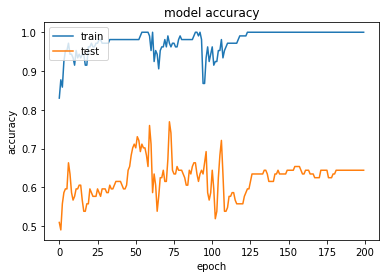

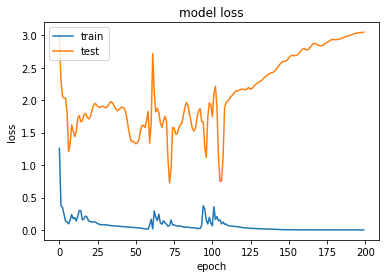

In [38]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

|모델|규제|정확도|
|:---|:---|:---|
|LSTM(256), batch_size=128|없음|67%|

약 67%의 낮은 정확도를 보여주며 overfitting 된 것을 확인 할 수 있다.


## Second model fit

In [48]:
model2 = Sequential()
model2.add(LSTM(256, input_shape=(seq_len, 4),return_sequences=True))
model2.add(LSTM(64))
model2.add(Dense(1, activation='sigmoid'))

In [50]:
adam = Adam(lr=0.001)
chk = ModelCheckpoint('best_model2.pkl', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history=model2.fit(train, train_target, epochs=200, batch_size=64, callbacks=[chk], validation_data=(validation,validation_target))

Epoch 1/200
1/2 [==============>...............] - ETA: 0s - loss: 0.6934 - accuracy: 0.5469
Epoch 00001: val_accuracy improved from -inf to 0.54808, saving model to best_model2.pkl
INFO:tensorflow:Assets written to: best_model2.pkl/assets
2/2 [==============================] - 4s 2s/step - loss: 0.6883 - accuracy: 0.5377 - val_loss: 0.6643 - val_accuracy: 0.5481
Epoch 2/200
1/2 [==============>...............] - ETA: 0s - loss: 0.6625 - accuracy: 0.6094
Epoch 00002: val_accuracy did not improve from 0.54808
2/2 [==============================] - 0s 13ms/step - loss: 0.6625 - accuracy: 0.5849 - val_loss: 0.6451 - val_accuracy: 0.5288
Epoch 3/200
1/2 [==============>...............] - ETA: 0s - loss: 0.6066 - accuracy: 0.7656
Epoch 00003: val_accuracy improved from 0.54808 to 0.58654, saving model to best_model2.pkl
INFO:tensorflow:Assets written to: best_model2.pkl/assets
2/2 [==============================] - 4s 2s/step - loss: 0.6116 - accuracy: 0.7453 - val_loss: 0.7628 - val_accura

1/2 [==============>...............] - ETA: 0s - loss: 0.2072 - accuracy: 0.9531
Epoch 00029: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 15ms/step - loss: 0.2350 - accuracy: 0.9434 - val_loss: 1.7074 - val_accuracy: 0.5577
Epoch 30/200
1/2 [==============>...............] - ETA: 0s - loss: 0.2522 - accuracy: 0.9219
Epoch 00030: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 14ms/step - loss: 0.2039 - accuracy: 0.9434 - val_loss: 1.6628 - val_accuracy: 0.5385
Epoch 31/200
1/2 [==============>...............] - ETA: 0s - loss: 0.1432 - accuracy: 0.9688
Epoch 00031: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 14ms/step - loss: 0.1580 - accuracy: 0.9528 - val_loss: 1.5988 - val_accuracy: 0.5577
Epoch 32/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0978 - accuracy: 0.9688
Epoch 00032: val_accuracy did not improve from 0.63462
2/2 [============================

1/2 [==============>...............] - ETA: 0s - loss: 0.1762 - accuracy: 0.8906
Epoch 00058: val_accuracy did not improve from 0.66346
2/2 [==============================] - 0s 14ms/step - loss: 0.1738 - accuracy: 0.8679 - val_loss: 1.7998 - val_accuracy: 0.5577
Epoch 59/200
1/2 [==============>...............] - ETA: 0s - loss: 0.1735 - accuracy: 0.8750
Epoch 00059: val_accuracy did not improve from 0.66346
2/2 [==============================] - 0s 15ms/step - loss: 0.1718 - accuracy: 0.8962 - val_loss: 1.7595 - val_accuracy: 0.5673
Epoch 60/200
1/2 [==============>...............] - ETA: 0s - loss: 0.1769 - accuracy: 0.9219
Epoch 00060: val_accuracy did not improve from 0.66346
2/2 [==============================] - 0s 14ms/step - loss: 0.1744 - accuracy: 0.9057 - val_loss: 1.7358 - val_accuracy: 0.5577
Epoch 61/200
1/2 [==============>...............] - ETA: 0s - loss: 0.1833 - accuracy: 0.9062
Epoch 00061: val_accuracy did not improve from 0.66346
2/2 [============================

Epoch 88/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0250 - accuracy: 0.9844
Epoch 00088: val_accuracy did not improve from 0.66346
2/2 [==============================] - 0s 14ms/step - loss: 0.0377 - accuracy: 0.9717 - val_loss: 1.5676 - val_accuracy: 0.6346
Epoch 89/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0430 - accuracy: 0.9844
Epoch 00089: val_accuracy did not improve from 0.66346
2/2 [==============================] - 0s 15ms/step - loss: 0.0386 - accuracy: 0.9811 - val_loss: 1.5734 - val_accuracy: 0.6442
Epoch 90/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0553 - accuracy: 0.9688
Epoch 00090: val_accuracy did not improve from 0.66346
2/2 [==============================] - 0s 15ms/step - loss: 0.0351 - accuracy: 0.9811 - val_loss: 1.6034 - val_accuracy: 0.6442
Epoch 91/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0257 - accuracy: 0.9844
Epoch 00091: val_accuracy did not improve from 0.66346
2/2 [===============

Epoch 117/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0644 - accuracy: 0.9688
Epoch 00117: val_accuracy did not improve from 0.69231
2/2 [==============================] - 0s 15ms/step - loss: 0.0728 - accuracy: 0.9623 - val_loss: 1.5241 - val_accuracy: 0.6635
Epoch 118/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0790 - accuracy: 0.9375
Epoch 00118: val_accuracy did not improve from 0.69231
2/2 [==============================] - 0s 14ms/step - loss: 0.0659 - accuracy: 0.9528 - val_loss: 1.6086 - val_accuracy: 0.6442
Epoch 119/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0592 - accuracy: 0.9844
Epoch 00119: val_accuracy did not improve from 0.69231
2/2 [==============================] - 0s 15ms/step - loss: 0.0623 - accuracy: 0.9717 - val_loss: 1.6645 - val_accuracy: 0.6154
Epoch 120/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0494 - accuracy: 0.9688
Epoch 00120: val_accuracy did not improve from 0.69231
2/2 [===========

1/2 [==============>...............] - ETA: 0s - loss: 0.0367 - accuracy: 1.0000
Epoch 00146: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 15ms/step - loss: 0.0246 - accuracy: 1.0000 - val_loss: 1.4553 - val_accuracy: 0.6923
Epoch 147/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0197 - accuracy: 1.0000
Epoch 00147: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 15ms/step - loss: 0.0232 - accuracy: 1.0000 - val_loss: 1.5079 - val_accuracy: 0.7019
Epoch 148/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0334 - accuracy: 1.0000
Epoch 00148: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 15ms/step - loss: 0.0217 - accuracy: 1.0000 - val_loss: 1.5477 - val_accuracy: 0.7019
Epoch 149/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0095 - accuracy: 1.0000
Epoch 00149: val_accuracy did not improve from 0.71154
2/2 [=========================

Epoch 176/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0056 - accuracy: 1.0000
Epoch 00176: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 15ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.8421 - val_accuracy: 0.6827
Epoch 177/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 00177: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 15ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.8450 - val_accuracy: 0.6827
Epoch 178/200
1/2 [==============>...............] - ETA: 0s - loss: 9.2575e-04 - accuracy: 1.0000
Epoch 00178: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 15ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.8494 - val_accuracy: 0.6827
Epoch 179/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0034 - accuracy: 1.0000
Epoch 00179: val_accuracy did not improve from 0.71154
2/2 [=======

## second model accuracy

In [51]:
model = load_model('best_model2.pkl')

from sklearn.metrics import accuracy_score
test_preds = model.predict_classes(test)
accuracy_score(test_target, test_preds)

0.7596153846153846

## history graph

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


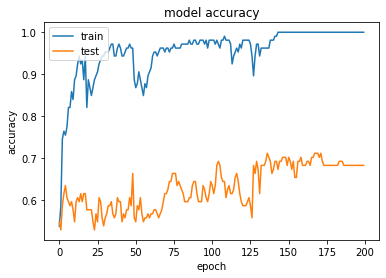

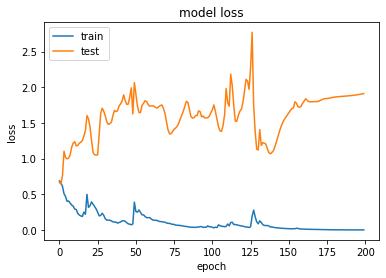

In [52]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

|모델|규제|정확도|
|:---|:---|:---|
|LSTM(256)+LSTM(64), batch_size=128|없음|75.9%|

약 75.9%의 낮은 정확도를 보여주며 overfitting 된 것을 확인 할 수 있다. 첫번째 모델 보단 정확도가 개선되었기 때문에 base model로 사용하여 정확도를 더 높여보도록 하겠다.

## 규제를 넣은 모델을 fit 해보자

In [39]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization


from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1

#  adding dropout & recurrent_dropout

 2015년 **야린 갈**에 의하면 순환 네트워크에 적절하게 드롭아웃을 사용하려면 랜덤하게 드롭아웃 마스크를 바꾸는것이 아닌 동일한 드롭아웃 마스크를 모든     
 타임스텝에 사용해야 한다고 한다.   

모든 타임스텝에 dropout=0.5, recurrent
 dropout=0.5를 추가하였으나 overfitting이 잔재하며 성능상 병목이 있는것으로 보여 네트워크의 용량을 늘려야겠다고 생각했다.

여러 조합의 LSTM과 GRU 모델을 적합하여 best model을 찾은 뒤 l1,l2 규제를 추가해 보고자 한다.

## LSTM

In [119]:
model1 = Sequential()
model1.add(LSTM(256, input_shape=(seq_len, 4),dropout=0.5, recurrent_dropout=0.5 ,
                return_sequences=True))
model1.add(LSTM(64,dropout=0.5, recurrent_dropout=0.5))
model1.add(Dense(1,activation='sigmoid')) # target이 binary이기 때문에 sigmoid 사용

In [120]:
adam = Adam(lr=0.001)
chk = ModelCheckpoint('best_model1.pkl', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history=model1.fit(train, train_target, epochs=200, batch_size=64, callbacks=[chk], validation_data=(validation,validation_target))

Epoch 1/200
2/2 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.4528
Epoch 00001: val_accuracy improved from -inf to 0.63462, saving model to best_model1.pkl
INFO:tensorflow:Assets written to: best_model1.pkl/assets
2/2 [==============================] - 3s 2s/step - loss: 0.6933 - accuracy: 0.4528 - val_loss: 0.6752 - val_accuracy: 0.6346
Epoch 2/200
2/2 [==============================] - ETA: 0s - loss: 0.6784 - accuracy: 0.5094
Epoch 00002: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 98ms/step - loss: 0.6784 - accuracy: 0.5094 - val_loss: 0.6542 - val_accuracy: 0.5865
Epoch 3/200
2/2 [==============================] - ETA: 0s - loss: 0.6360 - accuracy: 0.7075
Epoch 00003: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 97ms/step - loss: 0.6360 - accuracy: 0.7075 - val_loss: 0.6546 - val_accuracy: 0.5865
Epoch 4/200
2/2 [==============================] - ETA: 0s - loss: 0.5920 - accura

2/2 [==============================] - ETA: 0s - loss: 0.2701 - accuracy: 0.9340
Epoch 00030: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 98ms/step - loss: 0.2701 - accuracy: 0.9340 - val_loss: 1.1501 - val_accuracy: 0.5673
Epoch 31/200
2/2 [==============================] - ETA: 0s - loss: 0.3188 - accuracy: 0.8491
Epoch 00031: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 98ms/step - loss: 0.3188 - accuracy: 0.8491 - val_loss: 1.2176 - val_accuracy: 0.5288
Epoch 32/200
2/2 [==============================] - ETA: 0s - loss: 0.2267 - accuracy: 0.9151
Epoch 00032: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 113ms/step - loss: 0.2267 - accuracy: 0.9151 - val_loss: 1.1552 - val_accuracy: 0.5577
Epoch 33/200
2/2 [==============================] - ETA: 0s - loss: 0.2408 - accuracy: 0.9434
Epoch 00033: val_accuracy did not improve from 0.63462
2/2 [===========================

Epoch 59/200
2/2 [==============================] - ETA: 0s - loss: 0.1575 - accuracy: 0.9434
Epoch 00059: val_accuracy did not improve from 0.68269
2/2 [==============================] - 0s 102ms/step - loss: 0.1575 - accuracy: 0.9434 - val_loss: 1.1900 - val_accuracy: 0.5962
Epoch 60/200
2/2 [==============================] - ETA: 0s - loss: 0.2104 - accuracy: 0.9340
Epoch 00060: val_accuracy did not improve from 0.68269
2/2 [==============================] - 0s 99ms/step - loss: 0.2104 - accuracy: 0.9340 - val_loss: 1.3213 - val_accuracy: 0.5962
Epoch 61/200
2/2 [==============================] - ETA: 0s - loss: 0.1170 - accuracy: 0.9528
Epoch 00061: val_accuracy did not improve from 0.68269
2/2 [==============================] - 0s 97ms/step - loss: 0.1170 - accuracy: 0.9528 - val_loss: 1.3748 - val_accuracy: 0.5577
Epoch 62/200
2/2 [==============================] - ETA: 0s - loss: 0.2305 - accuracy: 0.9151
Epoch 00062: val_accuracy did not improve from 0.68269
2/2 [==============

2/2 [==============================] - ETA: 0s - loss: 0.2225 - accuracy: 0.9245
Epoch 00088: val_accuracy did not improve from 0.69231
2/2 [==============================] - 0s 98ms/step - loss: 0.2225 - accuracy: 0.9245 - val_loss: 1.1460 - val_accuracy: 0.6058
Epoch 89/200
2/2 [==============================] - ETA: 0s - loss: 0.1787 - accuracy: 0.9340
Epoch 00089: val_accuracy did not improve from 0.69231
2/2 [==============================] - 0s 102ms/step - loss: 0.1787 - accuracy: 0.9340 - val_loss: 1.1314 - val_accuracy: 0.5962
Epoch 90/200
2/2 [==============================] - ETA: 0s - loss: 0.1676 - accuracy: 0.9340
Epoch 00090: val_accuracy did not improve from 0.69231
2/2 [==============================] - 0s 98ms/step - loss: 0.1676 - accuracy: 0.9340 - val_loss: 1.0324 - val_accuracy: 0.6154
Epoch 91/200
2/2 [==============================] - ETA: 0s - loss: 0.1764 - accuracy: 0.9434
Epoch 00091: val_accuracy did not improve from 0.69231
2/2 [===========================

Epoch 117/200
2/2 [==============================] - ETA: 0s - loss: 0.1441 - accuracy: 0.9623
Epoch 00117: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 99ms/step - loss: 0.1441 - accuracy: 0.9623 - val_loss: 0.8264 - val_accuracy: 0.7019
Epoch 118/200
2/2 [==============================] - ETA: 0s - loss: 0.1751 - accuracy: 0.9434
Epoch 00118: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 98ms/step - loss: 0.1751 - accuracy: 0.9434 - val_loss: 0.9954 - val_accuracy: 0.6731
Epoch 119/200
2/2 [==============================] - ETA: 0s - loss: 0.1454 - accuracy: 0.9623
Epoch 00119: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 101ms/step - loss: 0.1454 - accuracy: 0.9623 - val_loss: 1.2954 - val_accuracy: 0.6154
Epoch 120/200
2/2 [==============================] - ETA: 0s - loss: 0.1602 - accuracy: 0.9434
Epoch 00120: val_accuracy did not improve from 0.71154
2/2 [==========

Epoch 147/200
2/2 [==============================] - ETA: 0s - loss: 0.1214 - accuracy: 0.9528
Epoch 00147: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 99ms/step - loss: 0.1214 - accuracy: 0.9528 - val_loss: 0.9466 - val_accuracy: 0.6442
Epoch 148/200
2/2 [==============================] - ETA: 0s - loss: 0.0923 - accuracy: 0.9623
Epoch 00148: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 97ms/step - loss: 0.0923 - accuracy: 0.9623 - val_loss: 0.9782 - val_accuracy: 0.6538
Epoch 149/200
2/2 [==============================] - ETA: 0s - loss: 0.1424 - accuracy: 0.9245
Epoch 00149: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 109ms/step - loss: 0.1424 - accuracy: 0.9245 - val_loss: 1.1119 - val_accuracy: 0.6346
Epoch 150/200
2/2 [==============================] - ETA: 0s - loss: 0.0900 - accuracy: 0.9811
Epoch 00150: val_accuracy did not improve from 0.71154
2/2 [==========

Epoch 177/200
2/2 [==============================] - ETA: 0s - loss: 0.1566 - accuracy: 0.9434
Epoch 00177: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 101ms/step - loss: 0.1566 - accuracy: 0.9434 - val_loss: 1.0707 - val_accuracy: 0.6538
Epoch 178/200
2/2 [==============================] - ETA: 0s - loss: 0.1161 - accuracy: 0.9340
Epoch 00178: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 99ms/step - loss: 0.1161 - accuracy: 0.9340 - val_loss: 1.0913 - val_accuracy: 0.6827
Epoch 179/200
2/2 [==============================] - ETA: 0s - loss: 0.0879 - accuracy: 0.9340
Epoch 00179: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 114ms/step - loss: 0.0879 - accuracy: 0.9340 - val_loss: 1.0581 - val_accuracy: 0.6827
Epoch 180/200
2/2 [==============================] - ETA: 0s - loss: 0.0567 - accuracy: 0.9717
Epoch 00180: val_accuracy did not improve from 0.71154
2/2 [=========

In [121]:
model = load_model('best_model1.pkl')

from sklearn.metrics import accuracy_score
test_preds = model.predict_classes(test)
accuracy_score(test_target, test_preds)

0.7211538461538461

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


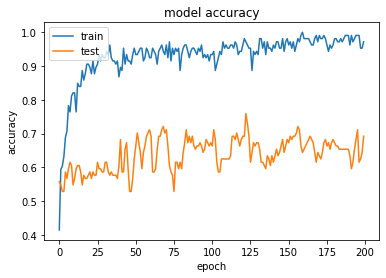

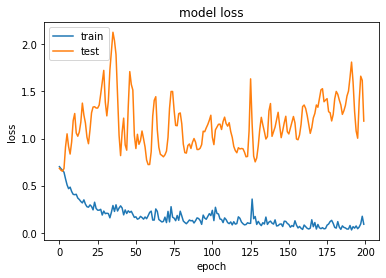

In [47]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

|모델|규제|정확도|
|:---|:---|:---|
|LSTM(256)+LSTM(64), batch_size=64|Dropout(0.5),recurrent_dropout=0.5|72.1%|

규제를 하기 전 보다 정확도가 약 3% 가량 하락하였으며 과대적합 또한 약간 개선된 것으로 보인다. 하지만 여전히 과대적합이다.


In [111]:
model4 = Sequential()
model4.add(LSTM(256, input_shape=(seq_len, 4),dropout=0.5, recurrent_dropout=0.5 ,
              return_sequences=True))
model4.add(LSTM(64,dropout=0.5, recurrent_dropout=0.5 , return_sequences=True))
model4.add(LSTM(32))

model4.add(Dense(1,activation='sigmoid'))

In [112]:
adam = Adam(lr=0.001)
chk = ModelCheckpoint('best_model4.pkl', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model4.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history=model4.fit(train, train_target, epochs=200, batch_size=64, callbacks=[chk], validation_data=(validation,validation_target))

Epoch 1/200
2/2 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.4528
Epoch 00001: val_accuracy improved from -inf to 0.53846, saving model to best_model4.pkl
INFO:tensorflow:Assets written to: best_model4.pkl/assets
2/2 [==============================] - 5s 2s/step - loss: 0.6920 - accuracy: 0.4528 - val_loss: 0.6635 - val_accuracy: 0.5385
Epoch 2/200
2/2 [==============================] - ETA: 0s - loss: 0.6584 - accuracy: 0.6415
Epoch 00002: val_accuracy improved from 0.53846 to 0.55769, saving model to best_model4.pkl
INFO:tensorflow:Assets written to: best_model4.pkl/assets
2/2 [==============================] - 4s 2s/step - loss: 0.6584 - accuracy: 0.6415 - val_loss: 0.6513 - val_accuracy: 0.5577
Epoch 3/200
2/2 [==============================] - ETA: 0s - loss: 0.6066 - accuracy: 0.7170
Epoch 00003: val_accuracy improved from 0.55769 to 0.59615, saving model to best_model4.pkl
INFO:tensorflow:Assets written to: best_model4.pkl/assets
2/2 [=================

2/2 [==============================] - ETA: 0s - loss: 0.2854 - accuracy: 0.8962
Epoch 00029: val_accuracy did not improve from 0.62500
2/2 [==============================] - 0s 105ms/step - loss: 0.2854 - accuracy: 0.8962 - val_loss: 0.9347 - val_accuracy: 0.5769
Epoch 30/200
2/2 [==============================] - ETA: 0s - loss: 0.2910 - accuracy: 0.9057
Epoch 00030: val_accuracy did not improve from 0.62500
2/2 [==============================] - 0s 102ms/step - loss: 0.2910 - accuracy: 0.9057 - val_loss: 0.9661 - val_accuracy: 0.5481
Epoch 31/200
2/2 [==============================] - ETA: 0s - loss: 0.2342 - accuracy: 0.9434
Epoch 00031: val_accuracy did not improve from 0.62500
2/2 [==============================] - 0s 100ms/step - loss: 0.2342 - accuracy: 0.9434 - val_loss: 1.0222 - val_accuracy: 0.5962
Epoch 32/200
2/2 [==============================] - ETA: 0s - loss: 0.2404 - accuracy: 0.9057
Epoch 00032: val_accuracy did not improve from 0.62500
2/2 [=========================

Epoch 58/200
2/2 [==============================] - ETA: 0s - loss: 0.2968 - accuracy: 0.9057
Epoch 00058: val_accuracy did not improve from 0.69231
2/2 [==============================] - 0s 101ms/step - loss: 0.2968 - accuracy: 0.9057 - val_loss: 1.1987 - val_accuracy: 0.5865
Epoch 59/200
2/2 [==============================] - ETA: 0s - loss: 0.1599 - accuracy: 0.9340
Epoch 00059: val_accuracy did not improve from 0.69231
2/2 [==============================] - 0s 101ms/step - loss: 0.1599 - accuracy: 0.9340 - val_loss: 1.2459 - val_accuracy: 0.5865
Epoch 60/200
2/2 [==============================] - ETA: 0s - loss: 0.1226 - accuracy: 0.9717
Epoch 00060: val_accuracy did not improve from 0.69231
2/2 [==============================] - 0s 104ms/step - loss: 0.1226 - accuracy: 0.9717 - val_loss: 1.2125 - val_accuracy: 0.5865
Epoch 61/200
2/2 [==============================] - ETA: 0s - loss: 0.1852 - accuracy: 0.9245
Epoch 00061: val_accuracy did not improve from 0.69231
2/2 [============

2/2 [==============================] - ETA: 0s - loss: 0.1462 - accuracy: 0.9434
Epoch 00087: val_accuracy did not improve from 0.70192
2/2 [==============================] - 0s 114ms/step - loss: 0.1462 - accuracy: 0.9434 - val_loss: 1.0592 - val_accuracy: 0.6250
Epoch 88/200
2/2 [==============================] - ETA: 0s - loss: 0.1749 - accuracy: 0.9623
Epoch 00088: val_accuracy did not improve from 0.70192
2/2 [==============================] - 0s 101ms/step - loss: 0.1749 - accuracy: 0.9623 - val_loss: 1.0748 - val_accuracy: 0.6154
Epoch 89/200
2/2 [==============================] - ETA: 0s - loss: 0.1178 - accuracy: 0.9528
Epoch 00089: val_accuracy did not improve from 0.70192
2/2 [==============================] - 0s 102ms/step - loss: 0.1178 - accuracy: 0.9528 - val_loss: 1.1134 - val_accuracy: 0.5962
Epoch 90/200
2/2 [==============================] - ETA: 0s - loss: 0.1295 - accuracy: 0.9717
Epoch 00090: val_accuracy did not improve from 0.70192
2/2 [=========================

INFO:tensorflow:Assets written to: best_model4.pkl/assets
2/2 [==============================] - 4s 2s/step - loss: 0.0925 - accuracy: 0.9623 - val_loss: 0.6719 - val_accuracy: 0.7212
Epoch 117/200
2/2 [==============================] - ETA: 0s - loss: 0.1059 - accuracy: 0.9623
Epoch 00117: val_accuracy did not improve from 0.72115
2/2 [==============================] - 0s 101ms/step - loss: 0.1059 - accuracy: 0.9623 - val_loss: 0.6770 - val_accuracy: 0.7212
Epoch 118/200
2/2 [==============================] - ETA: 0s - loss: 0.1522 - accuracy: 0.9340
Epoch 00118: val_accuracy did not improve from 0.72115
2/2 [==============================] - 0s 103ms/step - loss: 0.1522 - accuracy: 0.9340 - val_loss: 0.6987 - val_accuracy: 0.7212
Epoch 119/200
2/2 [==============================] - ETA: 0s - loss: 0.1271 - accuracy: 0.9528
Epoch 00119: val_accuracy did not improve from 0.72115
2/2 [==============================] - 0s 100ms/step - loss: 0.1271 - accuracy: 0.9528 - val_loss: 0.7501 - 

Epoch 146/200
2/2 [==============================] - ETA: 0s - loss: 0.0909 - accuracy: 0.9623
Epoch 00146: val_accuracy did not improve from 0.72115
2/2 [==============================] - 0s 102ms/step - loss: 0.0909 - accuracy: 0.9623 - val_loss: 0.9652 - val_accuracy: 0.6827
Epoch 147/200
2/2 [==============================] - ETA: 0s - loss: 0.1157 - accuracy: 0.9528
Epoch 00147: val_accuracy did not improve from 0.72115
2/2 [==============================] - 0s 104ms/step - loss: 0.1157 - accuracy: 0.9528 - val_loss: 0.9559 - val_accuracy: 0.6731
Epoch 148/200
2/2 [==============================] - ETA: 0s - loss: 0.0779 - accuracy: 0.9717
Epoch 00148: val_accuracy did not improve from 0.72115
2/2 [==============================] - 0s 103ms/step - loss: 0.0779 - accuracy: 0.9717 - val_loss: 0.9335 - val_accuracy: 0.6635
Epoch 149/200
2/2 [==============================] - ETA: 0s - loss: 0.0956 - accuracy: 0.9717
Epoch 00149: val_accuracy did not improve from 0.72115
2/2 [========

Epoch 176/200
2/2 [==============================] - ETA: 0s - loss: 0.0995 - accuracy: 0.9623
Epoch 00176: val_accuracy did not improve from 0.72115
2/2 [==============================] - 0s 109ms/step - loss: 0.0995 - accuracy: 0.9623 - val_loss: 1.3110 - val_accuracy: 0.6058
Epoch 177/200
2/2 [==============================] - ETA: 0s - loss: 0.0940 - accuracy: 0.9623
Epoch 00177: val_accuracy did not improve from 0.72115
2/2 [==============================] - 0s 103ms/step - loss: 0.0940 - accuracy: 0.9623 - val_loss: 1.1762 - val_accuracy: 0.6635
Epoch 178/200
2/2 [==============================] - ETA: 0s - loss: 0.0597 - accuracy: 0.9717
Epoch 00178: val_accuracy did not improve from 0.72115
2/2 [==============================] - 0s 99ms/step - loss: 0.0597 - accuracy: 0.9717 - val_loss: 1.1117 - val_accuracy: 0.6538
Epoch 179/200
2/2 [==============================] - ETA: 0s - loss: 0.0881 - accuracy: 0.9528
Epoch 00179: val_accuracy did not improve from 0.72115
2/2 [=========

In [113]:
model = load_model('best_model4.pkl')

from sklearn.metrics import accuracy_score
test_preds = model.predict_classes(test)
accuracy_score(test_target, test_preds)

0.7307692307692307

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


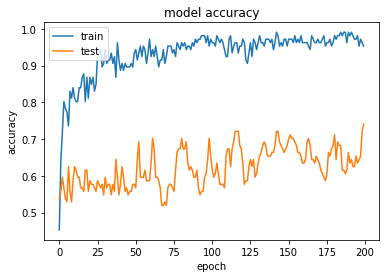

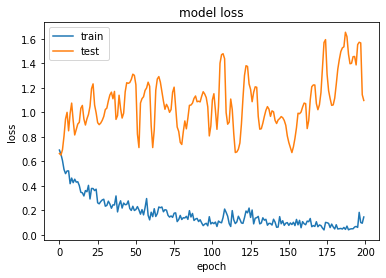

In [114]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

|모델|규제|정확도|
|:---|:---|:---|
|LSTM(256)+LSTM(64)+LSTM(32), batch_size=64|Dropout(0.5),recurrent_dropout=0.5|73.07%|

첫번째 모델보다 정확도가 약간 상승하였다. 모델의 복잡도를 더 올려보고자 한다.

In [115]:
model5 = Sequential()
model5.add(LSTM(256, input_shape=(seq_len, 4),dropout=0.5, recurrent_dropout=0.5 ,
                return_sequences=True))
model5.add(LSTM(512,dropout=0.5, recurrent_dropout=0.5 ,return_sequences=True))
model5.add(LSTM(64,dropout=0.5, recurrent_dropout=0.5 ))
model5.add(Dense(1,activation='sigmoid'))

In [116]:
adam = Adam(lr=0.001)
chk = ModelCheckpoint('best_model5.pkl', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model5.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history=model5.fit(train, train_target, epochs=200, batch_size=64, callbacks=[chk], validation_data=(validation,validation_target))

Epoch 1/200
2/2 [==============================] - ETA: 0s - loss: 0.6895 - accuracy: 0.5283
Epoch 00001: val_accuracy improved from -inf to 0.59615, saving model to best_model5.pkl
INFO:tensorflow:Assets written to: best_model5.pkl/assets
2/2 [==============================] - 4s 2s/step - loss: 0.6895 - accuracy: 0.5283 - val_loss: 0.6587 - val_accuracy: 0.5962
Epoch 2/200
2/2 [==============================] - ETA: 0s - loss: 0.6564 - accuracy: 0.7830
Epoch 00002: val_accuracy did not improve from 0.59615
2/2 [==============================] - 0s 152ms/step - loss: 0.6564 - accuracy: 0.7830 - val_loss: 0.7329 - val_accuracy: 0.5673
Epoch 3/200
2/2 [==============================] - ETA: 0s - loss: 0.5664 - accuracy: 0.7358
Epoch 00003: val_accuracy did not improve from 0.59615
2/2 [==============================] - 0s 153ms/step - loss: 0.5664 - accuracy: 0.7358 - val_loss: 0.9966 - val_accuracy: 0.5577
Epoch 4/200
2/2 [==============================] - ETA: 0s - loss: 0.4919 - accu

Epoch 30/200
2/2 [==============================] - ETA: 0s - loss: 0.3456 - accuracy: 0.8585
Epoch 00030: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 152ms/step - loss: 0.3456 - accuracy: 0.8585 - val_loss: 0.9932 - val_accuracy: 0.5673
Epoch 31/200
2/2 [==============================] - ETA: 0s - loss: 0.3494 - accuracy: 0.8396
Epoch 00031: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 152ms/step - loss: 0.3494 - accuracy: 0.8396 - val_loss: 1.1590 - val_accuracy: 0.5577
Epoch 32/200
2/2 [==============================] - ETA: 0s - loss: 0.3082 - accuracy: 0.8585
Epoch 00032: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 148ms/step - loss: 0.3082 - accuracy: 0.8585 - val_loss: 1.1951 - val_accuracy: 0.5769
Epoch 33/200
2/2 [==============================] - ETA: 0s - loss: 0.2138 - accuracy: 0.9245
Epoch 00033: val_accuracy did not improve from 0.63462
2/2 [============

Epoch 59/200
2/2 [==============================] - ETA: 0s - loss: 0.2529 - accuracy: 0.8585
Epoch 00059: val_accuracy did not improve from 0.69231
2/2 [==============================] - 0s 148ms/step - loss: 0.2529 - accuracy: 0.8585 - val_loss: 0.9623 - val_accuracy: 0.6635
Epoch 60/200
2/2 [==============================] - ETA: 0s - loss: 0.1650 - accuracy: 0.9151
Epoch 00060: val_accuracy did not improve from 0.69231
2/2 [==============================] - 0s 155ms/step - loss: 0.1650 - accuracy: 0.9151 - val_loss: 1.0055 - val_accuracy: 0.6635
Epoch 61/200
2/2 [==============================] - ETA: 0s - loss: 0.1974 - accuracy: 0.8962
Epoch 00061: val_accuracy did not improve from 0.69231
2/2 [==============================] - 0s 149ms/step - loss: 0.1974 - accuracy: 0.8962 - val_loss: 1.2925 - val_accuracy: 0.6058
Epoch 62/200
2/2 [==============================] - ETA: 0s - loss: 0.1976 - accuracy: 0.9057
Epoch 00062: val_accuracy did not improve from 0.69231
2/2 [============

2/2 [==============================] - ETA: 0s - loss: 0.2295 - accuracy: 0.9245
Epoch 00088: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 148ms/step - loss: 0.2295 - accuracy: 0.9245 - val_loss: 0.9824 - val_accuracy: 0.6635
Epoch 89/200
2/2 [==============================] - ETA: 0s - loss: 0.0941 - accuracy: 0.9717
Epoch 00089: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 151ms/step - loss: 0.0941 - accuracy: 0.9717 - val_loss: 1.4053 - val_accuracy: 0.5962
Epoch 90/200
2/2 [==============================] - ETA: 0s - loss: 0.1462 - accuracy: 0.9623
Epoch 00090: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 150ms/step - loss: 0.1462 - accuracy: 0.9623 - val_loss: 1.4617 - val_accuracy: 0.5962
Epoch 91/200
2/2 [==============================] - ETA: 0s - loss: 0.1711 - accuracy: 0.9434
Epoch 00091: val_accuracy did not improve from 0.71154
2/2 [=========================

Epoch 117/200
2/2 [==============================] - ETA: 0s - loss: 0.0630 - accuracy: 0.9717
Epoch 00117: val_accuracy did not improve from 0.75962
2/2 [==============================] - 0s 152ms/step - loss: 0.0630 - accuracy: 0.9717 - val_loss: 1.7315 - val_accuracy: 0.5385
Epoch 118/200
2/2 [==============================] - ETA: 0s - loss: 0.1281 - accuracy: 0.9623
Epoch 00118: val_accuracy did not improve from 0.75962
2/2 [==============================] - 0s 150ms/step - loss: 0.1281 - accuracy: 0.9623 - val_loss: 1.7376 - val_accuracy: 0.5385
Epoch 119/200
2/2 [==============================] - ETA: 0s - loss: 0.2375 - accuracy: 0.9245
Epoch 00119: val_accuracy did not improve from 0.75962
2/2 [==============================] - 0s 152ms/step - loss: 0.2375 - accuracy: 0.9245 - val_loss: 0.8335 - val_accuracy: 0.6250
Epoch 120/200
2/2 [==============================] - ETA: 0s - loss: 0.0717 - accuracy: 0.9811
Epoch 00120: val_accuracy did not improve from 0.75962
2/2 [========

Epoch 146/200
2/2 [==============================] - ETA: 0s - loss: 0.0822 - accuracy: 0.9811
Epoch 00146: val_accuracy did not improve from 0.78846
2/2 [==============================] - 0s 147ms/step - loss: 0.0822 - accuracy: 0.9811 - val_loss: 0.6856 - val_accuracy: 0.7212
Epoch 147/200
2/2 [==============================] - ETA: 0s - loss: 0.0926 - accuracy: 0.9717
Epoch 00147: val_accuracy did not improve from 0.78846
2/2 [==============================] - 0s 154ms/step - loss: 0.0926 - accuracy: 0.9717 - val_loss: 0.6943 - val_accuracy: 0.6923
Epoch 148/200
2/2 [==============================] - ETA: 0s - loss: 0.1433 - accuracy: 0.9528
Epoch 00148: val_accuracy did not improve from 0.78846
2/2 [==============================] - 0s 147ms/step - loss: 0.1433 - accuracy: 0.9528 - val_loss: 0.7642 - val_accuracy: 0.6827
Epoch 149/200
2/2 [==============================] - ETA: 0s - loss: 0.0889 - accuracy: 0.9623
Epoch 00149: val_accuracy did not improve from 0.78846
2/2 [========

Epoch 176/200
2/2 [==============================] - ETA: 0s - loss: 0.1213 - accuracy: 0.9623
Epoch 00176: val_accuracy did not improve from 0.78846
2/2 [==============================] - 0s 150ms/step - loss: 0.1213 - accuracy: 0.9623 - val_loss: 0.8564 - val_accuracy: 0.6923
Epoch 177/200
2/2 [==============================] - ETA: 0s - loss: 0.1077 - accuracy: 0.9623
Epoch 00177: val_accuracy did not improve from 0.78846
2/2 [==============================] - 0s 148ms/step - loss: 0.1077 - accuracy: 0.9623 - val_loss: 0.6574 - val_accuracy: 0.7404
Epoch 178/200
2/2 [==============================] - ETA: 0s - loss: 0.1630 - accuracy: 0.9245
Epoch 00178: val_accuracy did not improve from 0.78846
2/2 [==============================] - 0s 150ms/step - loss: 0.1630 - accuracy: 0.9245 - val_loss: 0.6115 - val_accuracy: 0.7404
Epoch 179/200
2/2 [==============================] - ETA: 0s - loss: 0.1602 - accuracy: 0.9528
Epoch 00179: val_accuracy did not improve from 0.78846
2/2 [========

In [117]:
model = load_model('best_model5.pkl')

from sklearn.metrics import accuracy_score
test_preds = model.predict_classes(test)
accuracy_score(test_target, test_preds)

0.75

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


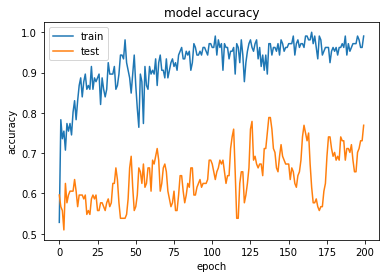

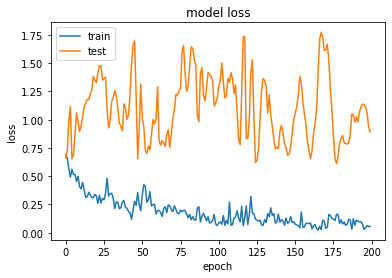

In [118]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

|모델|규제|정확도|
|:---|:---|:---|
|LSTM(256)+LSTM(512)+LSTM(64), batch_size=64|Dropout(0.5),recurrent_dropout=0.5|75%|

역시 두번째 모델 보다 정확도 면에서 개선된 점이 있어 모델 복잡도를 더 높여보고자 한다.

## Best model using LSTM

In [130]:
model6 = Sequential()
model6.add(LSTM(256, input_shape=(seq_len, 4),dropout=0.5, recurrent_dropout=0.5 ,
                return_sequences=True))
model6.add(LSTM(512,dropout=0.5, recurrent_dropout=0.5 ,return_sequences=True))
model6.add(LSTM(64,dropout=0.5, recurrent_dropout=0.5,return_sequences=True))
model6.add(LSTM(32,dropout=0.5, recurrent_dropout=0.5 ,return_sequences=False))
model6.add(Dense(1,activation='sigmoid'))

In [131]:
adam = Adam(lr=0.001)
chk = ModelCheckpoint('best_model6.pkl', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model6.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history=model6.fit(train, train_target, epochs=200, batch_size=64, callbacks=[chk], validation_data=(validation,validation_target))

Epoch 1/200
2/2 [==============================] - ETA: 0s - loss: 0.6867 - accuracy: 0.4717
Epoch 00001: val_accuracy improved from -inf to 0.54808, saving model to best_model6.pkl
INFO:tensorflow:Assets written to: best_model6.pkl/assets
2/2 [==============================] - 6s 3s/step - loss: 0.6867 - accuracy: 0.4717 - val_loss: 0.6467 - val_accuracy: 0.5481
Epoch 2/200
2/2 [==============================] - ETA: 0s - loss: 0.6122 - accuracy: 0.7170
Epoch 00002: val_accuracy improved from 0.54808 to 0.56731, saving model to best_model6.pkl
INFO:tensorflow:Assets written to: best_model6.pkl/assets
2/2 [==============================] - 6s 3s/step - loss: 0.6122 - accuracy: 0.7170 - val_loss: 0.8223 - val_accuracy: 0.5673
Epoch 3/200
2/2 [==============================] - ETA: 0s - loss: 0.5370 - accuracy: 0.7264
Epoch 00003: val_accuracy did not improve from 0.56731
2/2 [==============================] - 0s 196ms/step - loss: 0.5370 - accuracy: 0.7264 - val_loss: 1.0399 - val_accur

Epoch 30/200
2/2 [==============================] - ETA: 0s - loss: 0.3299 - accuracy: 0.8868
Epoch 00030: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 199ms/step - loss: 0.3299 - accuracy: 0.8868 - val_loss: 1.0671 - val_accuracy: 0.5769
Epoch 31/200
2/2 [==============================] - ETA: 0s - loss: 0.2437 - accuracy: 0.9151
Epoch 00031: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 193ms/step - loss: 0.2437 - accuracy: 0.9151 - val_loss: 1.0045 - val_accuracy: 0.5673
Epoch 32/200
2/2 [==============================] - ETA: 0s - loss: 0.2226 - accuracy: 0.9340
Epoch 00032: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 194ms/step - loss: 0.2226 - accuracy: 0.9340 - val_loss: 1.0610 - val_accuracy: 0.5769
Epoch 33/200
2/2 [==============================] - ETA: 0s - loss: 0.3341 - accuracy: 0.8774
Epoch 00033: val_accuracy did not improve from 0.63462
2/2 [============

Epoch 59/200
2/2 [==============================] - ETA: 0s - loss: 0.3934 - accuracy: 0.8019
Epoch 00059: val_accuracy did not improve from 0.65385
2/2 [==============================] - 0s 196ms/step - loss: 0.3934 - accuracy: 0.8019 - val_loss: 0.6192 - val_accuracy: 0.6154
Epoch 60/200
2/2 [==============================] - ETA: 0s - loss: 0.2539 - accuracy: 0.8774
Epoch 00060: val_accuracy did not improve from 0.65385
2/2 [==============================] - 0s 197ms/step - loss: 0.2539 - accuracy: 0.8774 - val_loss: 0.6913 - val_accuracy: 0.6442
Epoch 61/200
2/2 [==============================] - ETA: 0s - loss: 0.2295 - accuracy: 0.9057
Epoch 00061: val_accuracy did not improve from 0.65385
2/2 [==============================] - 0s 192ms/step - loss: 0.2295 - accuracy: 0.9057 - val_loss: 1.1559 - val_accuracy: 0.5385
Epoch 62/200
2/2 [==============================] - ETA: 0s - loss: 0.2145 - accuracy: 0.8868
Epoch 00062: val_accuracy did not improve from 0.65385
2/2 [============

2/2 [==============================] - ETA: 0s - loss: 0.1742 - accuracy: 0.9340
Epoch 00088: val_accuracy did not improve from 0.67308
2/2 [==============================] - 0s 196ms/step - loss: 0.1742 - accuracy: 0.9340 - val_loss: 0.8894 - val_accuracy: 0.6250
Epoch 89/200
2/2 [==============================] - ETA: 0s - loss: 0.1343 - accuracy: 0.9434
Epoch 00089: val_accuracy improved from 0.67308 to 0.68269, saving model to best_model6.pkl
INFO:tensorflow:Assets written to: best_model6.pkl/assets
2/2 [==============================] - 5s 3s/step - loss: 0.1343 - accuracy: 0.9434 - val_loss: 0.7567 - val_accuracy: 0.6827
Epoch 90/200
2/2 [==============================] - ETA: 0s - loss: 0.1167 - accuracy: 0.9623
Epoch 00090: val_accuracy did not improve from 0.68269
2/2 [==============================] - 0s 193ms/step - loss: 0.1167 - accuracy: 0.9623 - val_loss: 0.9832 - val_accuracy: 0.6538
Epoch 91/200
2/2 [==============================] - ETA: 0s - loss: 0.0851 - accuracy: 

Epoch 117/200
2/2 [==============================] - ETA: 0s - loss: 0.1331 - accuracy: 0.9623
Epoch 00117: val_accuracy did not improve from 0.74038
2/2 [==============================] - 0s 200ms/step - loss: 0.1331 - accuracy: 0.9623 - val_loss: 1.3485 - val_accuracy: 0.6154
Epoch 118/200
2/2 [==============================] - ETA: 0s - loss: 0.0828 - accuracy: 0.9811
Epoch 00118: val_accuracy did not improve from 0.74038
2/2 [==============================] - 0s 201ms/step - loss: 0.0828 - accuracy: 0.9811 - val_loss: 1.2440 - val_accuracy: 0.6250
Epoch 119/200
2/2 [==============================] - ETA: 0s - loss: 0.0984 - accuracy: 0.9528
Epoch 00119: val_accuracy did not improve from 0.74038
2/2 [==============================] - 0s 196ms/step - loss: 0.0984 - accuracy: 0.9528 - val_loss: 0.9551 - val_accuracy: 0.7115
Epoch 120/200
2/2 [==============================] - ETA: 0s - loss: 0.0690 - accuracy: 0.9811
Epoch 00120: val_accuracy improved from 0.74038 to 0.75000, saving m

2/2 [==============================] - ETA: 0s - loss: 0.0780 - accuracy: 0.9717
Epoch 00146: val_accuracy did not improve from 0.75000
2/2 [==============================] - 0s 197ms/step - loss: 0.0780 - accuracy: 0.9717 - val_loss: 1.1783 - val_accuracy: 0.6250
Epoch 147/200
2/2 [==============================] - ETA: 0s - loss: 0.1375 - accuracy: 0.9528
Epoch 00147: val_accuracy did not improve from 0.75000
2/2 [==============================] - 0s 194ms/step - loss: 0.1375 - accuracy: 0.9528 - val_loss: 1.0340 - val_accuracy: 0.6058
Epoch 148/200
2/2 [==============================] - ETA: 0s - loss: 0.1466 - accuracy: 0.9434
Epoch 00148: val_accuracy did not improve from 0.75000
2/2 [==============================] - 0s 199ms/step - loss: 0.1466 - accuracy: 0.9434 - val_loss: 1.1596 - val_accuracy: 0.5865
Epoch 149/200
2/2 [==============================] - ETA: 0s - loss: 0.1065 - accuracy: 0.9434
Epoch 00149: val_accuracy did not improve from 0.75000
2/2 [======================

Epoch 176/200
2/2 [==============================] - ETA: 0s - loss: 0.0889 - accuracy: 0.9717
Epoch 00176: val_accuracy did not improve from 0.75000
2/2 [==============================] - 0s 194ms/step - loss: 0.0889 - accuracy: 0.9717 - val_loss: 1.5488 - val_accuracy: 0.6346
Epoch 177/200
2/2 [==============================] - ETA: 0s - loss: 0.0597 - accuracy: 0.9811
Epoch 00177: val_accuracy did not improve from 0.75000
2/2 [==============================] - 0s 191ms/step - loss: 0.0597 - accuracy: 0.9811 - val_loss: 1.5682 - val_accuracy: 0.6250
Epoch 178/200
2/2 [==============================] - ETA: 0s - loss: 0.1495 - accuracy: 0.9528
Epoch 00178: val_accuracy did not improve from 0.75000
2/2 [==============================] - 0s 199ms/step - loss: 0.1495 - accuracy: 0.9528 - val_loss: 1.5285 - val_accuracy: 0.6250
Epoch 179/200
2/2 [==============================] - ETA: 0s - loss: 0.1090 - accuracy: 0.9623
Epoch 00179: val_accuracy did not improve from 0.75000
2/2 [========

In [132]:
model = load_model('best_model6.pkl')

from sklearn.metrics import accuracy_score
test_preds = model.predict_classes(test)
accuracy_score(test_target, test_preds)

0.8269230769230769

|모델|규제|정확도|
|:---|:---|:---|
|LSTM(256)+LSTM(512)+LSTM(64)+LSTM(32), batch_size=64|Dropout(0.5),recurrent_dropout=0.5|82.7%|

역시 이전 모델 보다 정확도 면에서 개선된 점이 있어 모델 복잡도를 더 높이고 계산비용을 고려하여 epoch=100으로 진행해보고자 한다.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


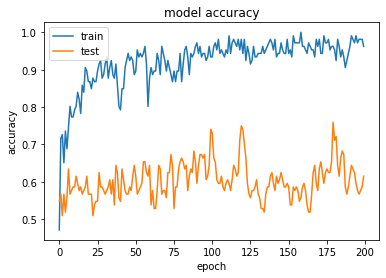

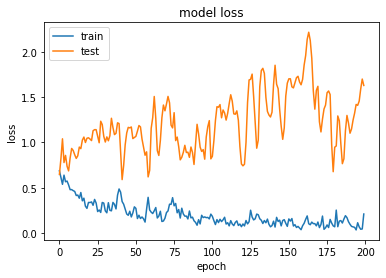

In [133]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [135]:
model7 = Sequential()
model7.add(LSTM(256, input_shape=(seq_len, 4),dropout=0.5, recurrent_dropout=0.5 ,
                return_sequences=True))
model7.add(LSTM(512,dropout=0.5, recurrent_dropout=0.5 ,return_sequences=True))
model7.add(LSTM(64,dropout=0.5, recurrent_dropout=0.5,return_sequences=True))
model7.add(LSTM(32,dropout=0.5, recurrent_dropout=0.5 ,return_sequences=True))
model7.add(LSTM(16,dropout=0.5, recurrent_dropout=0.5 ,return_sequences=False))
model7.add(Dense(1,activation='sigmoid'))

In [136]:
adam = Adam(lr=0.001)
chk = ModelCheckpoint('best_model7.pkl', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model7.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history=model7.fit(train, train_target, epochs=100, batch_size=64, callbacks=[chk], validation_data=(validation,validation_target))

Epoch 1/100
2/2 [==============================] - ETA: 0s - loss: 0.6881 - accuracy: 0.5472
Epoch 00001: val_accuracy improved from -inf to 0.57692, saving model to best_model7.pkl
INFO:tensorflow:Assets written to: best_model7.pkl/assets
2/2 [==============================] - 7s 4s/step - loss: 0.6881 - accuracy: 0.5472 - val_loss: 0.6648 - val_accuracy: 0.5769
Epoch 2/100
2/2 [==============================] - ETA: 0s - loss: 0.6585 - accuracy: 0.6132
Epoch 00002: val_accuracy did not improve from 0.57692
2/2 [==============================] - 0s 244ms/step - loss: 0.6585 - accuracy: 0.6132 - val_loss: 0.6807 - val_accuracy: 0.5385
Epoch 3/100
2/2 [==============================] - ETA: 0s - loss: 0.5669 - accuracy: 0.7547
Epoch 00003: val_accuracy improved from 0.57692 to 0.58654, saving model to best_model7.pkl
INFO:tensorflow:Assets written to: best_model7.pkl/assets
2/2 [==============================] - 7s 3s/step - loss: 0.5669 - accuracy: 0.7547 - val_loss: 0.7410 - val_accur

2/2 [==============================] - ETA: 0s - loss: 0.2474 - accuracy: 0.9151
Epoch 00029: val_accuracy did not improve from 0.62500
2/2 [==============================] - 0s 241ms/step - loss: 0.2474 - accuracy: 0.9151 - val_loss: 1.0043 - val_accuracy: 0.5865
Epoch 30/100
2/2 [==============================] - ETA: 0s - loss: 0.2399 - accuracy: 0.9245
Epoch 00030: val_accuracy did not improve from 0.62500
2/2 [==============================] - 0s 239ms/step - loss: 0.2399 - accuracy: 0.9245 - val_loss: 0.9926 - val_accuracy: 0.5962
Epoch 31/100
2/2 [==============================] - ETA: 0s - loss: 0.2363 - accuracy: 0.9057
Epoch 00031: val_accuracy did not improve from 0.62500
2/2 [==============================] - 0s 239ms/step - loss: 0.2363 - accuracy: 0.9057 - val_loss: 1.0051 - val_accuracy: 0.5769
Epoch 32/100
2/2 [==============================] - ETA: 0s - loss: 0.2417 - accuracy: 0.9057
Epoch 00032: val_accuracy did not improve from 0.62500
2/2 [=========================

2/2 [==============================] - ETA: 0s - loss: 0.1377 - accuracy: 0.9528
Epoch 00058: val_accuracy did not improve from 0.72115
2/2 [==============================] - 0s 241ms/step - loss: 0.1377 - accuracy: 0.9528 - val_loss: 1.2347 - val_accuracy: 0.5962
Epoch 59/100
2/2 [==============================] - ETA: 0s - loss: 0.1762 - accuracy: 0.9340
Epoch 00059: val_accuracy did not improve from 0.72115
2/2 [==============================] - 0s 248ms/step - loss: 0.1762 - accuracy: 0.9340 - val_loss: 1.1927 - val_accuracy: 0.6346
Epoch 60/100
2/2 [==============================] - ETA: 0s - loss: 0.2087 - accuracy: 0.9340
Epoch 00060: val_accuracy did not improve from 0.72115
2/2 [==============================] - 0s 246ms/step - loss: 0.2087 - accuracy: 0.9340 - val_loss: 1.2947 - val_accuracy: 0.6154
Epoch 61/100
2/2 [==============================] - ETA: 0s - loss: 0.1705 - accuracy: 0.9434
Epoch 00061: val_accuracy did not improve from 0.72115
2/2 [=========================

Epoch 87/100
2/2 [==============================] - ETA: 0s - loss: 0.2815 - accuracy: 0.8679
Epoch 00087: val_accuracy did not improve from 0.76923
2/2 [==============================] - 0s 241ms/step - loss: 0.2815 - accuracy: 0.8679 - val_loss: 0.9191 - val_accuracy: 0.6250
Epoch 88/100
2/2 [==============================] - ETA: 0s - loss: 0.2949 - accuracy: 0.8679
Epoch 00088: val_accuracy did not improve from 0.76923
2/2 [==============================] - 0s 242ms/step - loss: 0.2949 - accuracy: 0.8679 - val_loss: 0.9748 - val_accuracy: 0.6250
Epoch 89/100
2/2 [==============================] - ETA: 0s - loss: 0.2625 - accuracy: 0.8774
Epoch 00089: val_accuracy did not improve from 0.76923
2/2 [==============================] - 0s 244ms/step - loss: 0.2625 - accuracy: 0.8774 - val_loss: 1.0832 - val_accuracy: 0.6346
Epoch 90/100
2/2 [==============================] - ETA: 0s - loss: 0.3234 - accuracy: 0.8491
Epoch 00090: val_accuracy did not improve from 0.76923
2/2 [============

In [137]:
model = load_model('best_model7.pkl')

from sklearn.metrics import accuracy_score
test_preds = model.predict_classes(test)
accuracy_score(test_target, test_preds)

0.6923076923076923

|모델|규제|정확도|
|:---|:---|:---|
|LSTM(256)+LSTM(512)+LSTM(64)+LSTM(32)+LSTM(16), batch_size=64|Dropout(0.5),recurrent_dropout=0.5|69.2%|

이전 모델에 비해 모델 복잡도는 증가하였으나 정확도는 많이 떨어져 이전 모델을 선택하고자 한다.

## GRU

LSTM과 같은 원리로 작동하지만 조금 더 간결하고 계산 비용이 덜 든다. 하지만 LSTM만큼 표현 학습 능력이 좋지 않을 순 있다.

## Best model using GRU

In [210]:
from tensorflow.keras.layers import GRU

modelu = Sequential()
modelu.add(GRU(256, input_shape=(seq_len, 4),dropout=0.5, recurrent_dropout=0.5 ,
                return_sequences=True))
modelu.add(GRU(64,dropout=0.5, recurrent_dropout=0.5 ))
modelu.add(Dense(1,activation='sigmoid'))

In [214]:
adam = Adam(lr=0.001)
chk = ModelCheckpoint('best_modelu.pkl', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
modelu.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history=modelu.fit(train, train_target, epochs=200, batch_size=64, callbacks=[chk], validation_data=(validation,validation_target))

Epoch 1/200
2/2 [==============================] - ETA: 0s - loss: 0.1221 - accuracy: 0.9623
Epoch 00001: val_accuracy improved from -inf to 0.67308, saving model to best_modelu.pkl
INFO:tensorflow:Assets written to: best_modelu.pkl/assets
2/2 [==============================] - 3s 2s/step - loss: 0.1221 - accuracy: 0.9623 - val_loss: 1.4123 - val_accuracy: 0.6731
Epoch 2/200
2/2 [==============================] - ETA: 0s - loss: 0.2126 - accuracy: 0.9340
Epoch 00002: val_accuracy improved from 0.67308 to 0.69231, saving model to best_modelu.pkl
INFO:tensorflow:Assets written to: best_modelu.pkl/assets
2/2 [==============================] - 3s 1s/step - loss: 0.2126 - accuracy: 0.9340 - val_loss: 1.3157 - val_accuracy: 0.6923
Epoch 3/200
2/2 [==============================] - ETA: 0s - loss: 0.1431 - accuracy: 0.9528
Epoch 00003: val_accuracy did not improve from 0.69231
2/2 [==============================] - 0s 95ms/step - loss: 0.1431 - accuracy: 0.9528 - val_loss: 1.3380 - val_accura

Epoch 30/200
2/2 [==============================] - ETA: 0s - loss: 0.0878 - accuracy: 0.9811
Epoch 00030: val_accuracy did not improve from 0.70192
2/2 [==============================] - 0s 92ms/step - loss: 0.0878 - accuracy: 0.9811 - val_loss: 1.2455 - val_accuracy: 0.6538
Epoch 31/200
2/2 [==============================] - ETA: 0s - loss: 0.0589 - accuracy: 0.9906
Epoch 00031: val_accuracy did not improve from 0.70192
2/2 [==============================] - 0s 91ms/step - loss: 0.0589 - accuracy: 0.9906 - val_loss: 1.2857 - val_accuracy: 0.6538
Epoch 32/200
2/2 [==============================] - ETA: 0s - loss: 0.1421 - accuracy: 0.9434
Epoch 00032: val_accuracy did not improve from 0.70192
2/2 [==============================] - 0s 91ms/step - loss: 0.1421 - accuracy: 0.9434 - val_loss: 1.2914 - val_accuracy: 0.6538
Epoch 33/200
2/2 [==============================] - ETA: 0s - loss: 0.0963 - accuracy: 0.9717
Epoch 00033: val_accuracy did not improve from 0.70192
2/2 [===============

2/2 [==============================] - ETA: 0s - loss: 0.0868 - accuracy: 0.9623
Epoch 00059: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 92ms/step - loss: 0.0868 - accuracy: 0.9623 - val_loss: 1.5142 - val_accuracy: 0.6538
Epoch 60/200
2/2 [==============================] - ETA: 0s - loss: 0.0844 - accuracy: 0.9623
Epoch 00060: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 92ms/step - loss: 0.0844 - accuracy: 0.9623 - val_loss: 1.3791 - val_accuracy: 0.6923
Epoch 61/200
2/2 [==============================] - ETA: 0s - loss: 0.1004 - accuracy: 0.9623
Epoch 00061: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 93ms/step - loss: 0.1004 - accuracy: 0.9623 - val_loss: 1.2164 - val_accuracy: 0.7019
Epoch 62/200
2/2 [==============================] - ETA: 0s - loss: 0.0978 - accuracy: 0.9623
Epoch 00062: val_accuracy improved from 0.71154 to 0.72115, saving model to best_modelu.

Epoch 88/200
2/2 [==============================] - ETA: 0s - loss: 0.0642 - accuracy: 0.9717
Epoch 00088: val_accuracy did not improve from 0.75962
2/2 [==============================] - 0s 91ms/step - loss: 0.0642 - accuracy: 0.9717 - val_loss: 1.2110 - val_accuracy: 0.7500
Epoch 89/200
2/2 [==============================] - ETA: 0s - loss: 0.1364 - accuracy: 0.9623
Epoch 00089: val_accuracy did not improve from 0.75962
2/2 [==============================] - 0s 90ms/step - loss: 0.1364 - accuracy: 0.9623 - val_loss: 1.3531 - val_accuracy: 0.6923
Epoch 90/200
2/2 [==============================] - ETA: 0s - loss: 0.0737 - accuracy: 0.9811
Epoch 00090: val_accuracy did not improve from 0.75962
2/2 [==============================] - 0s 93ms/step - loss: 0.0737 - accuracy: 0.9811 - val_loss: 1.5189 - val_accuracy: 0.7019
Epoch 91/200
2/2 [==============================] - ETA: 0s - loss: 0.1538 - accuracy: 0.9623
Epoch 00091: val_accuracy did not improve from 0.75962
2/2 [===============

2/2 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9811
Epoch 00117: val_accuracy did not improve from 0.76923
2/2 [==============================] - 0s 96ms/step - loss: 0.0409 - accuracy: 0.9811 - val_loss: 1.0924 - val_accuracy: 0.7115
Epoch 118/200
2/2 [==============================] - ETA: 0s - loss: 0.0877 - accuracy: 0.9623
Epoch 00118: val_accuracy did not improve from 0.76923
2/2 [==============================] - 0s 95ms/step - loss: 0.0877 - accuracy: 0.9623 - val_loss: 1.0496 - val_accuracy: 0.7308
Epoch 119/200
2/2 [==============================] - ETA: 0s - loss: 0.0576 - accuracy: 0.9717
Epoch 00119: val_accuracy did not improve from 0.76923
2/2 [==============================] - 0s 92ms/step - loss: 0.0576 - accuracy: 0.9717 - val_loss: 1.0271 - val_accuracy: 0.7212
Epoch 120/200
2/2 [==============================] - ETA: 0s - loss: 0.0637 - accuracy: 0.9717
Epoch 00120: val_accuracy did not improve from 0.76923
2/2 [=========================

2/2 [==============================] - ETA: 0s - loss: 0.0489 - accuracy: 0.9906
Epoch 00146: val_accuracy did not improve from 0.78846
2/2 [==============================] - 0s 92ms/step - loss: 0.0489 - accuracy: 0.9906 - val_loss: 1.3281 - val_accuracy: 0.7019
Epoch 147/200
2/2 [==============================] - ETA: 0s - loss: 0.0340 - accuracy: 0.9811
Epoch 00147: val_accuracy did not improve from 0.78846
2/2 [==============================] - 0s 91ms/step - loss: 0.0340 - accuracy: 0.9811 - val_loss: 1.4360 - val_accuracy: 0.6923
Epoch 148/200
2/2 [==============================] - ETA: 0s - loss: 0.0311 - accuracy: 0.9811
Epoch 00148: val_accuracy did not improve from 0.78846
2/2 [==============================] - 0s 93ms/step - loss: 0.0311 - accuracy: 0.9811 - val_loss: 1.4900 - val_accuracy: 0.6923
Epoch 149/200
2/2 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9717
Epoch 00149: val_accuracy did not improve from 0.78846
2/2 [=========================

Epoch 176/200
2/2 [==============================] - ETA: 0s - loss: 0.0205 - accuracy: 0.9906
Epoch 00176: val_accuracy did not improve from 0.78846
2/2 [==============================] - 0s 95ms/step - loss: 0.0205 - accuracy: 0.9906 - val_loss: 1.5159 - val_accuracy: 0.6827
Epoch 177/200
2/2 [==============================] - ETA: 0s - loss: 0.0248 - accuracy: 0.9906
Epoch 00177: val_accuracy did not improve from 0.78846
2/2 [==============================] - 0s 90ms/step - loss: 0.0248 - accuracy: 0.9906 - val_loss: 1.4721 - val_accuracy: 0.6827
Epoch 178/200
2/2 [==============================] - ETA: 0s - loss: 0.0576 - accuracy: 0.9811
Epoch 00178: val_accuracy did not improve from 0.78846
2/2 [==============================] - 0s 93ms/step - loss: 0.0576 - accuracy: 0.9811 - val_loss: 1.4426 - val_accuracy: 0.7212
Epoch 179/200
2/2 [==============================] - ETA: 0s - loss: 0.1206 - accuracy: 0.9623
Epoch 00179: val_accuracy did not improve from 0.78846
2/2 [===========

In [215]:
model = load_model('best_modelu.pkl')

from sklearn.metrics import accuracy_score
test_preds = model.predict_classes(test)
accuracy_score(test_target, test_preds)

0.7307692307692307

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


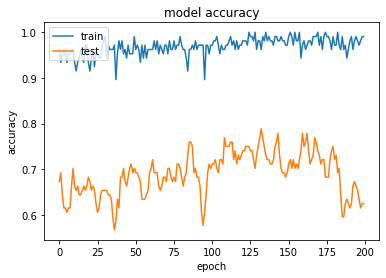

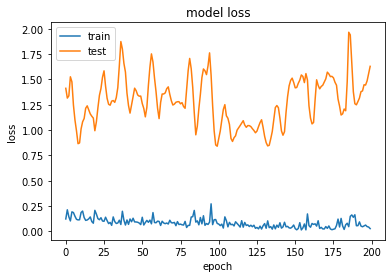

In [216]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

|모델|규제|정확도|
|:---|:---|:---|
|GRU(256)+GRU(64), batch_size=64|Dropout(0.5),recurrent_dropout=0.5|73%|

정확도가 약 73%로 낮아 layer를 추가하는 시도를 해 볼 필요가 있어보인다.

In [141]:
from tensorflow.keras.layers import GRU

modelg1 = Sequential()
modelg1.add(GRU(256, input_shape=(seq_len, 4),dropout=0.5, recurrent_dropout=0.5 ,
                return_sequences=True))
modelg1.add(GRU(64,dropout=0.5, recurrent_dropout=0.5 ,
                return_sequences=True))
modelg1.add(GRU(32,dropout=0.5, recurrent_dropout=0.5 ))
modelg1.add(Dense(1,activation='sigmoid'))

In [142]:
adam = Adam(lr=0.001)
chk = ModelCheckpoint('best_modelg1.pkl', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
modelg1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history=modelg1.fit(train, train_target, epochs=200, batch_size=64, callbacks=[chk], validation_data=(validation,validation_target))

Epoch 1/200
2/2 [==============================] - ETA: 0s - loss: 0.6991 - accuracy: 0.4434
Epoch 00001: val_accuracy improved from -inf to 0.61538, saving model to best_modelg1.pkl
INFO:tensorflow:Assets written to: best_modelg1.pkl/assets
2/2 [==============================] - 7s 3s/step - loss: 0.6991 - accuracy: 0.4434 - val_loss: 0.6778 - val_accuracy: 0.6154
Epoch 2/200
2/2 [==============================] - ETA: 0s - loss: 0.6734 - accuracy: 0.5283
Epoch 00002: val_accuracy improved from 0.61538 to 0.63462, saving model to best_modelg1.pkl
INFO:tensorflow:Assets written to: best_modelg1.pkl/assets
2/2 [==============================] - 4s 2s/step - loss: 0.6734 - accuracy: 0.5283 - val_loss: 0.6660 - val_accuracy: 0.6346
Epoch 3/200
2/2 [==============================] - ETA: 0s - loss: 0.6643 - accuracy: 0.5849
Epoch 00003: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 133ms/step - loss: 0.6643 - accuracy: 0.5849 - val_loss: 0.6563 - val_a

Epoch 30/200
2/2 [==============================] - ETA: 0s - loss: 0.4901 - accuracy: 0.7830
Epoch 00030: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 133ms/step - loss: 0.4901 - accuracy: 0.7830 - val_loss: 0.9360 - val_accuracy: 0.5962
Epoch 31/200
2/2 [==============================] - ETA: 0s - loss: 0.4251 - accuracy: 0.7925
Epoch 00031: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 132ms/step - loss: 0.4251 - accuracy: 0.7925 - val_loss: 0.9942 - val_accuracy: 0.5481
Epoch 32/200
2/2 [==============================] - ETA: 0s - loss: 0.4227 - accuracy: 0.8302
Epoch 00032: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 135ms/step - loss: 0.4227 - accuracy: 0.8302 - val_loss: 0.9913 - val_accuracy: 0.5673
Epoch 33/200
2/2 [==============================] - ETA: 0s - loss: 0.4029 - accuracy: 0.8208
Epoch 00033: val_accuracy did not improve from 0.63462
2/2 [============

Epoch 60/200
2/2 [==============================] - ETA: 0s - loss: 0.3298 - accuracy: 0.8774
Epoch 00060: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 135ms/step - loss: 0.3298 - accuracy: 0.8774 - val_loss: 1.4155 - val_accuracy: 0.5577
Epoch 61/200
2/2 [==============================] - ETA: 0s - loss: 0.2614 - accuracy: 0.9057
Epoch 00061: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 130ms/step - loss: 0.2614 - accuracy: 0.9057 - val_loss: 1.2319 - val_accuracy: 0.5865
Epoch 62/200
2/2 [==============================] - ETA: 0s - loss: 0.2204 - accuracy: 0.9434
Epoch 00062: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 131ms/step - loss: 0.2204 - accuracy: 0.9434 - val_loss: 1.1599 - val_accuracy: 0.5865
Epoch 63/200
2/2 [==============================] - ETA: 0s - loss: 0.2200 - accuracy: 0.9245
Epoch 00063: val_accuracy did not improve from 0.63462
2/2 [============

2/2 [==============================] - ETA: 0s - loss: 0.2023 - accuracy: 0.9245
Epoch 00089: val_accuracy improved from 0.64423 to 0.66346, saving model to best_modelg1.pkl
INFO:tensorflow:Assets written to: best_modelg1.pkl/assets
2/2 [==============================] - 4s 2s/step - loss: 0.2023 - accuracy: 0.9245 - val_loss: 0.9922 - val_accuracy: 0.6635
Epoch 90/200
2/2 [==============================] - ETA: 0s - loss: 0.2796 - accuracy: 0.9245
Epoch 00090: val_accuracy did not improve from 0.66346
2/2 [==============================] - 0s 134ms/step - loss: 0.2796 - accuracy: 0.9245 - val_loss: 1.2146 - val_accuracy: 0.6058
Epoch 91/200
2/2 [==============================] - ETA: 0s - loss: 0.2937 - accuracy: 0.8868
Epoch 00091: val_accuracy did not improve from 0.66346
2/2 [==============================] - 0s 132ms/step - loss: 0.2937 - accuracy: 0.8868 - val_loss: 1.3787 - val_accuracy: 0.5865
Epoch 92/200
2/2 [==============================] - ETA: 0s - loss: 0.2222 - accuracy

2/2 [==============================] - ETA: 0s - loss: 0.1764 - accuracy: 0.9340
Epoch 00118: val_accuracy did not improve from 0.66346
2/2 [==============================] - 0s 135ms/step - loss: 0.1764 - accuracy: 0.9340 - val_loss: 1.5409 - val_accuracy: 0.6154
Epoch 119/200
2/2 [==============================] - ETA: 0s - loss: 0.1604 - accuracy: 0.9434
Epoch 00119: val_accuracy did not improve from 0.66346
2/2 [==============================] - 0s 133ms/step - loss: 0.1604 - accuracy: 0.9434 - val_loss: 1.4488 - val_accuracy: 0.6346
Epoch 120/200
2/2 [==============================] - ETA: 0s - loss: 0.2201 - accuracy: 0.9434
Epoch 00120: val_accuracy did not improve from 0.66346
2/2 [==============================] - 0s 144ms/step - loss: 0.2201 - accuracy: 0.9434 - val_loss: 1.3815 - val_accuracy: 0.6250
Epoch 121/200
2/2 [==============================] - ETA: 0s - loss: 0.1382 - accuracy: 0.9434
Epoch 00121: val_accuracy did not improve from 0.66346
2/2 [======================

Epoch 147/200
2/2 [==============================] - ETA: 0s - loss: 0.1017 - accuracy: 0.9717
Epoch 00147: val_accuracy did not improve from 0.68269
2/2 [==============================] - 0s 132ms/step - loss: 0.1017 - accuracy: 0.9717 - val_loss: 1.1443 - val_accuracy: 0.6731
Epoch 148/200
2/2 [==============================] - ETA: 0s - loss: 0.1215 - accuracy: 0.9623
Epoch 00148: val_accuracy did not improve from 0.68269
2/2 [==============================] - 0s 134ms/step - loss: 0.1215 - accuracy: 0.9623 - val_loss: 1.1214 - val_accuracy: 0.6827
Epoch 149/200
2/2 [==============================] - ETA: 0s - loss: 0.1874 - accuracy: 0.9245
Epoch 00149: val_accuracy improved from 0.68269 to 0.69231, saving model to best_modelg1.pkl
INFO:tensorflow:Assets written to: best_modelg1.pkl/assets
2/2 [==============================] - 4s 2s/step - loss: 0.1874 - accuracy: 0.9245 - val_loss: 1.0121 - val_accuracy: 0.6923
Epoch 150/200
2/2 [==============================] - ETA: 0s - loss: 

2/2 [==============================] - ETA: 0s - loss: 0.1261 - accuracy: 0.9528
Epoch 00176: val_accuracy did not improve from 0.69231
2/2 [==============================] - 0s 130ms/step - loss: 0.1261 - accuracy: 0.9528 - val_loss: 1.1605 - val_accuracy: 0.6346
Epoch 177/200
2/2 [==============================] - ETA: 0s - loss: 0.1499 - accuracy: 0.9434
Epoch 00177: val_accuracy did not improve from 0.69231
2/2 [==============================] - 0s 131ms/step - loss: 0.1499 - accuracy: 0.9434 - val_loss: 1.1389 - val_accuracy: 0.6442
Epoch 178/200
2/2 [==============================] - ETA: 0s - loss: 0.1332 - accuracy: 0.9434
Epoch 00178: val_accuracy did not improve from 0.69231
2/2 [==============================] - 0s 132ms/step - loss: 0.1332 - accuracy: 0.9434 - val_loss: 1.1300 - val_accuracy: 0.6538
Epoch 179/200
2/2 [==============================] - ETA: 0s - loss: 0.1006 - accuracy: 0.9717
Epoch 00179: val_accuracy did not improve from 0.69231
2/2 [======================

In [143]:
model = load_model('best_modelg1.pkl')

from sklearn.metrics import accuracy_score
test_preds = model.predict_classes(test)
accuracy_score(test_target, test_preds)

0.6346153846153846

|모델|규제|정확도|
|:---|:---|:---|
|GRU(256)+GRU(64)+GRU(32), batch_size=64|Dropout(0.5),recurrent_dropout=0.5|63.5%|

정확도가 약 63.5%로 많이 하락하였으며 모델의 복잡도와 정확도는 비례한 관계가 아닌것을 알 수 있었다.

In [147]:
modelg2 = Sequential()
modelg2.add(GRU(256, input_shape=(seq_len, 4),dropout=0.5, recurrent_dropout=0.5 ,
                return_sequences=True))
modelg2.add(GRU(128,
                return_sequences=False))


modelg2.add(Dense(1,activation='sigmoid'))

In [148]:
adam = Adam(lr=0.001)
chk = ModelCheckpoint('best_modelg2.pkl', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
modelg2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history=modelg2.fit(train, train_target, epochs=200, batch_size=64, callbacks=[chk], validation_data=(validation,validation_target))

Epoch 1/200
2/2 [==============================] - ETA: 0s - loss: 0.7009 - accuracy: 0.5283
Epoch 00001: val_accuracy improved from -inf to 0.62500, saving model to best_modelg2.pkl
INFO:tensorflow:Assets written to: best_modelg2.pkl/assets
2/2 [==============================] - 3s 2s/step - loss: 0.7009 - accuracy: 0.5283 - val_loss: 0.6724 - val_accuracy: 0.6250
Epoch 2/200
2/2 [==============================] - ETA: 0s - loss: 0.6685 - accuracy: 0.6604
Epoch 00002: val_accuracy did not improve from 0.62500
2/2 [==============================] - 0s 52ms/step - loss: 0.6685 - accuracy: 0.6604 - val_loss: 0.6510 - val_accuracy: 0.6250
Epoch 3/200
2/2 [==============================] - ETA: 0s - loss: 0.6675 - accuracy: 0.5943
Epoch 00003: val_accuracy did not improve from 0.62500
2/2 [==============================] - 0s 53ms/step - loss: 0.6675 - accuracy: 0.5943 - val_loss: 0.6476 - val_accuracy: 0.5577
Epoch 4/200
2/2 [==============================] - ETA: 0s - loss: 0.6603 - accu

Epoch 30/200
2/2 [==============================] - ETA: 0s - loss: 0.3963 - accuracy: 0.8019
Epoch 00030: val_accuracy did not improve from 0.64423
2/2 [==============================] - 0s 51ms/step - loss: 0.3963 - accuracy: 0.8019 - val_loss: 1.1275 - val_accuracy: 0.6154
Epoch 31/200
2/2 [==============================] - ETA: 0s - loss: 0.4105 - accuracy: 0.8491
Epoch 00031: val_accuracy did not improve from 0.64423
2/2 [==============================] - 0s 52ms/step - loss: 0.4105 - accuracy: 0.8491 - val_loss: 1.1678 - val_accuracy: 0.6058
Epoch 32/200
2/2 [==============================] - ETA: 0s - loss: 0.3694 - accuracy: 0.8491
Epoch 00032: val_accuracy did not improve from 0.64423
2/2 [==============================] - 0s 58ms/step - loss: 0.3694 - accuracy: 0.8491 - val_loss: 1.0196 - val_accuracy: 0.5577
Epoch 33/200
2/2 [==============================] - ETA: 0s - loss: 0.4207 - accuracy: 0.8019
Epoch 00033: val_accuracy did not improve from 0.64423
2/2 [===============

Epoch 60/200
2/2 [==============================] - ETA: 0s - loss: 0.2377 - accuracy: 0.9151
Epoch 00060: val_accuracy did not improve from 0.64423
2/2 [==============================] - 0s 53ms/step - loss: 0.2377 - accuracy: 0.9151 - val_loss: 1.3670 - val_accuracy: 0.5288
Epoch 61/200
2/2 [==============================] - ETA: 0s - loss: 0.3300 - accuracy: 0.8585
Epoch 00061: val_accuracy did not improve from 0.64423
2/2 [==============================] - 0s 51ms/step - loss: 0.3300 - accuracy: 0.8585 - val_loss: 1.3605 - val_accuracy: 0.5481
Epoch 62/200
2/2 [==============================] - ETA: 0s - loss: 0.2959 - accuracy: 0.8962
Epoch 00062: val_accuracy did not improve from 0.64423
2/2 [==============================] - 0s 57ms/step - loss: 0.2959 - accuracy: 0.8962 - val_loss: 1.2587 - val_accuracy: 0.5481
Epoch 63/200
2/2 [==============================] - ETA: 0s - loss: 0.2157 - accuracy: 0.9245
Epoch 00063: val_accuracy did not improve from 0.64423
2/2 [===============

Epoch 90/200
2/2 [==============================] - ETA: 0s - loss: 0.1812 - accuracy: 0.9151
Epoch 00090: val_accuracy did not improve from 0.64423
2/2 [==============================] - 0s 51ms/step - loss: 0.1812 - accuracy: 0.9151 - val_loss: 1.3423 - val_accuracy: 0.5673
Epoch 91/200
2/2 [==============================] - ETA: 0s - loss: 0.1830 - accuracy: 0.9245
Epoch 00091: val_accuracy did not improve from 0.64423
2/2 [==============================] - 0s 51ms/step - loss: 0.1830 - accuracy: 0.9245 - val_loss: 1.2764 - val_accuracy: 0.5865
Epoch 92/200
2/2 [==============================] - ETA: 0s - loss: 0.1660 - accuracy: 0.9434
Epoch 00092: val_accuracy did not improve from 0.64423
2/2 [==============================] - 0s 52ms/step - loss: 0.1660 - accuracy: 0.9434 - val_loss: 1.2915 - val_accuracy: 0.5769
Epoch 93/200
2/2 [==============================] - ETA: 0s - loss: 0.2038 - accuracy: 0.8774
Epoch 00093: val_accuracy did not improve from 0.64423
2/2 [===============

Epoch 119/200
2/2 [==============================] - ETA: 0s - loss: 0.1645 - accuracy: 0.9245
Epoch 00119: val_accuracy did not improve from 0.68269
2/2 [==============================] - 0s 52ms/step - loss: 0.1645 - accuracy: 0.9245 - val_loss: 1.2477 - val_accuracy: 0.6154
Epoch 120/200
2/2 [==============================] - ETA: 0s - loss: 0.0834 - accuracy: 0.9811
Epoch 00120: val_accuracy did not improve from 0.68269
2/2 [==============================] - 0s 50ms/step - loss: 0.0834 - accuracy: 0.9811 - val_loss: 1.1731 - val_accuracy: 0.6538
Epoch 121/200
2/2 [==============================] - ETA: 0s - loss: 0.1414 - accuracy: 0.9434
Epoch 00121: val_accuracy improved from 0.68269 to 0.70192, saving model to best_modelg2.pkl
INFO:tensorflow:Assets written to: best_modelg2.pkl/assets
2/2 [==============================] - 3s 2s/step - loss: 0.1414 - accuracy: 0.9434 - val_loss: 1.1750 - val_accuracy: 0.7019
Epoch 122/200
2/2 [==============================] - ETA: 0s - loss: 0.

Epoch 148/200
2/2 [==============================] - ETA: 0s - loss: 0.0765 - accuracy: 0.9906
Epoch 00148: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 50ms/step - loss: 0.0765 - accuracy: 0.9906 - val_loss: 0.9907 - val_accuracy: 0.6923
Epoch 149/200
2/2 [==============================] - ETA: 0s - loss: 0.1236 - accuracy: 0.9528
Epoch 00149: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 55ms/step - loss: 0.1236 - accuracy: 0.9528 - val_loss: 1.1600 - val_accuracy: 0.6635
Epoch 150/200
2/2 [==============================] - ETA: 0s - loss: 0.1308 - accuracy: 0.9623
Epoch 00150: val_accuracy did not improve from 0.71154
2/2 [==============================] - 0s 54ms/step - loss: 0.1308 - accuracy: 0.9623 - val_loss: 1.4456 - val_accuracy: 0.6154
Epoch 151/200
2/2 [==============================] - ETA: 0s - loss: 0.1166 - accuracy: 0.9623
Epoch 00151: val_accuracy did not improve from 0.71154
2/2 [===========

Epoch 177/200
2/2 [==============================] - ETA: 0s - loss: 0.0630 - accuracy: 0.9811
Epoch 00177: val_accuracy did not improve from 0.77885
2/2 [==============================] - 0s 55ms/step - loss: 0.0630 - accuracy: 0.9811 - val_loss: 1.3437 - val_accuracy: 0.7115
Epoch 178/200
2/2 [==============================] - ETA: 0s - loss: 0.0588 - accuracy: 0.9717
Epoch 00178: val_accuracy did not improve from 0.77885
2/2 [==============================] - 0s 52ms/step - loss: 0.0588 - accuracy: 0.9717 - val_loss: 1.1624 - val_accuracy: 0.7596
Epoch 179/200
2/2 [==============================] - ETA: 0s - loss: 0.0784 - accuracy: 0.9717
Epoch 00179: val_accuracy improved from 0.77885 to 0.78846, saving model to best_modelg2.pkl
INFO:tensorflow:Assets written to: best_modelg2.pkl/assets
2/2 [==============================] - 3s 2s/step - loss: 0.0784 - accuracy: 0.9717 - val_loss: 1.0765 - val_accuracy: 0.7885
Epoch 180/200
2/2 [==============================] - ETA: 0s - loss: 0.

In [149]:
model = load_model('best_modelg2.pkl')

from sklearn.metrics import accuracy_score
test_preds = model.predict_classes(test)
accuracy_score(test_target, test_preds)

0.6442307692307693

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


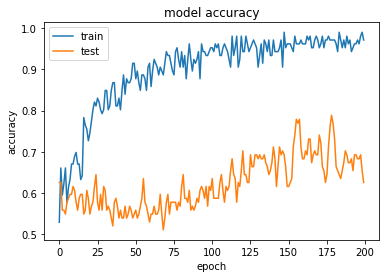

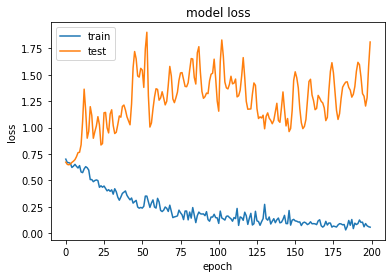

In [150]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

|모델|규제|정확도|
|:---|:---|:---|
|GRU(256)+GRU(128), batch_size=64|Dropout(0.5),recurrent_dropout=0.5|64.4%|

오히려 GRU에서는 간단한 모델이 더 잘 적합되는 현상을 보이고 있다.

# LSTM과 GRU의 Best model에 L1, L2 regularization 추가

최대한 정확도를 끌어 올린 후 과대적합에 대한 문제를 해결하기 위해 추가적으로 규제를 추가하였다.



## 1. LSTM Best Model

In [171]:
model66 = Sequential()
model66.add(LSTM(256, input_shape=(seq_len, 4),dropout=0.5, recurrent_dropout=0.5 ,
                kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),
                return_sequences=True))
model66.add(LSTM(512,dropout=0.5, recurrent_dropout=0.5 ,return_sequences=True))
model66.add(LSTM(64,dropout=0.5, recurrent_dropout=0.5,return_sequences=True))
model66.add(LSTM(32,dropout=0.5, recurrent_dropout=0.5 ,return_sequences=False))
model66.add(Dense(1,activation='sigmoid'))

In [172]:
model66.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_84 (LSTM)               (None, 42, 256)           267264    
_________________________________________________________________
lstm_85 (LSTM)               (None, 42, 512)           1574912   
_________________________________________________________________
lstm_86 (LSTM)               (None, 42, 64)            147712    
_________________________________________________________________
lstm_87 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 33        
Total params: 2,002,337
Trainable params: 2,002,337
Non-trainable params: 0
_________________________________________________________________


In [173]:
adam = Adam(lr=0.001)
chk = ModelCheckpoint('best_model66.pkl', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model66.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history=model66.fit(train, train_target, epochs=200, batch_size=64, callbacks=[chk], validation_data=(validation,validation_target))

Epoch 1/200
2/2 [==============================] - ETA: 0s - loss: 3.3348 - accuracy: 0.3868
Epoch 00001: val_accuracy improved from -inf to 0.55769, saving model to best_model66.pkl
INFO:tensorflow:Assets written to: best_model66.pkl/assets
2/2 [==============================] - 6s 3s/step - loss: 3.3348 - accuracy: 0.3868 - val_loss: 3.2954 - val_accuracy: 0.5577
Epoch 2/200
2/2 [==============================] - ETA: 0s - loss: 3.2833 - accuracy: 0.7358
Epoch 00002: val_accuracy did not improve from 0.55769
2/2 [==============================] - 0s 195ms/step - loss: 3.2833 - accuracy: 0.7358 - val_loss: 3.3083 - val_accuracy: 0.5288
Epoch 3/200
2/2 [==============================] - ETA: 0s - loss: 3.1918 - accuracy: 0.7075
Epoch 00003: val_accuracy improved from 0.55769 to 0.60577, saving model to best_model66.pkl
INFO:tensorflow:Assets written to: best_model66.pkl/assets
2/2 [==============================] - 6s 3s/step - loss: 3.1918 - accuracy: 0.7075 - val_loss: 3.4036 - val_a

Epoch 30/200
2/2 [==============================] - ETA: 0s - loss: 2.5636 - accuracy: 0.9057
Epoch 00030: val_accuracy did not improve from 0.61538
2/2 [==============================] - 0s 191ms/step - loss: 2.5636 - accuracy: 0.9057 - val_loss: 3.4547 - val_accuracy: 0.5577
Epoch 31/200
2/2 [==============================] - ETA: 0s - loss: 2.5580 - accuracy: 0.8774
Epoch 00031: val_accuracy did not improve from 0.61538
2/2 [==============================] - 0s 193ms/step - loss: 2.5580 - accuracy: 0.8774 - val_loss: 3.5026 - val_accuracy: 0.5865
Epoch 32/200
2/2 [==============================] - ETA: 0s - loss: 2.5396 - accuracy: 0.8868
Epoch 00032: val_accuracy did not improve from 0.61538
2/2 [==============================] - 0s 191ms/step - loss: 2.5396 - accuracy: 0.8868 - val_loss: 3.4353 - val_accuracy: 0.5577
Epoch 33/200
2/2 [==============================] - ETA: 0s - loss: 2.5194 - accuracy: 0.9057
Epoch 00033: val_accuracy did not improve from 0.61538
2/2 [============

Epoch 59/200
2/2 [==============================] - ETA: 0s - loss: 2.2450 - accuracy: 0.9151
Epoch 00059: val_accuracy did not improve from 0.67308
2/2 [==============================] - 0s 192ms/step - loss: 2.2450 - accuracy: 0.9151 - val_loss: 3.0547 - val_accuracy: 0.5865
Epoch 60/200
2/2 [==============================] - ETA: 0s - loss: 2.3095 - accuracy: 0.8962
Epoch 00060: val_accuracy did not improve from 0.67308
2/2 [==============================] - 0s 184ms/step - loss: 2.3095 - accuracy: 0.8962 - val_loss: 3.0420 - val_accuracy: 0.5962
Epoch 61/200
2/2 [==============================] - ETA: 0s - loss: 2.1395 - accuracy: 0.9623
Epoch 00061: val_accuracy did not improve from 0.67308
2/2 [==============================] - 0s 196ms/step - loss: 2.1395 - accuracy: 0.9623 - val_loss: 2.9097 - val_accuracy: 0.5962
Epoch 62/200
2/2 [==============================] - ETA: 0s - loss: 2.2230 - accuracy: 0.9151
Epoch 00062: val_accuracy did not improve from 0.67308
2/2 [============

2/2 [==============================] - ETA: 0s - loss: 1.9251 - accuracy: 0.9717
Epoch 00088: val_accuracy did not improve from 0.69231
2/2 [==============================] - 0s 192ms/step - loss: 1.9251 - accuracy: 0.9717 - val_loss: 2.9154 - val_accuracy: 0.6731
Epoch 89/200
2/2 [==============================] - ETA: 0s - loss: 1.9581 - accuracy: 0.9434
Epoch 00089: val_accuracy did not improve from 0.69231
2/2 [==============================] - 0s 193ms/step - loss: 1.9581 - accuracy: 0.9434 - val_loss: 2.6998 - val_accuracy: 0.6635
Epoch 90/200
2/2 [==============================] - ETA: 0s - loss: 1.8998 - accuracy: 0.9717
Epoch 00090: val_accuracy improved from 0.69231 to 0.71154, saving model to best_model66.pkl
INFO:tensorflow:Assets written to: best_model66.pkl/assets
2/2 [==============================] - 5s 3s/step - loss: 1.8998 - accuracy: 0.9717 - val_loss: 2.5692 - val_accuracy: 0.7115
Epoch 91/200
2/2 [==============================] - ETA: 0s - loss: 1.9231 - accuracy

Epoch 117/200
2/2 [==============================] - ETA: 0s - loss: 1.7382 - accuracy: 0.9528
Epoch 00117: val_accuracy did not improve from 0.72115
2/2 [==============================] - 0s 193ms/step - loss: 1.7382 - accuracy: 0.9528 - val_loss: 2.4424 - val_accuracy: 0.6827
Epoch 118/200
2/2 [==============================] - ETA: 0s - loss: 1.6959 - accuracy: 0.9623
Epoch 00118: val_accuracy did not improve from 0.72115
2/2 [==============================] - 0s 195ms/step - loss: 1.6959 - accuracy: 0.9623 - val_loss: 2.4101 - val_accuracy: 0.6827
Epoch 119/200
2/2 [==============================] - ETA: 0s - loss: 1.7152 - accuracy: 0.9528
Epoch 00119: val_accuracy improved from 0.72115 to 0.73077, saving model to best_model66.pkl
INFO:tensorflow:Assets written to: best_model66.pkl/assets
2/2 [==============================] - 5s 3s/step - loss: 1.7152 - accuracy: 0.9528 - val_loss: 2.3061 - val_accuracy: 0.7308
Epoch 120/200
2/2 [==============================] - ETA: 0s - loss: 

Epoch 146/200
2/2 [==============================] - ETA: 0s - loss: 1.5566 - accuracy: 0.9340
Epoch 00146: val_accuracy did not improve from 0.77885
2/2 [==============================] - 0s 196ms/step - loss: 1.5566 - accuracy: 0.9340 - val_loss: 1.8488 - val_accuracy: 0.7404
Epoch 147/200
2/2 [==============================] - ETA: 0s - loss: 1.5070 - accuracy: 0.9717
Epoch 00147: val_accuracy did not improve from 0.77885
2/2 [==============================] - 0s 197ms/step - loss: 1.5070 - accuracy: 0.9717 - val_loss: 2.0145 - val_accuracy: 0.7212
Epoch 148/200
2/2 [==============================] - ETA: 0s - loss: 1.4828 - accuracy: 0.9623
Epoch 00148: val_accuracy did not improve from 0.77885
2/2 [==============================] - 0s 198ms/step - loss: 1.4828 - accuracy: 0.9623 - val_loss: 2.2175 - val_accuracy: 0.6923
Epoch 149/200
2/2 [==============================] - ETA: 0s - loss: 1.4728 - accuracy: 0.9623
Epoch 00149: val_accuracy did not improve from 0.77885
2/2 [========

Epoch 176/200
2/2 [==============================] - ETA: 0s - loss: 1.3348 - accuracy: 0.9623
Epoch 00176: val_accuracy did not improve from 0.77885
2/2 [==============================] - 0s 196ms/step - loss: 1.3348 - accuracy: 0.9623 - val_loss: 2.2942 - val_accuracy: 0.6923
Epoch 177/200
2/2 [==============================] - ETA: 0s - loss: 1.2971 - accuracy: 0.9717
Epoch 00177: val_accuracy did not improve from 0.77885
2/2 [==============================] - 0s 195ms/step - loss: 1.2971 - accuracy: 0.9717 - val_loss: 2.3227 - val_accuracy: 0.6827
Epoch 178/200
2/2 [==============================] - ETA: 0s - loss: 1.3252 - accuracy: 0.9434
Epoch 00178: val_accuracy did not improve from 0.77885
2/2 [==============================] - 0s 196ms/step - loss: 1.3252 - accuracy: 0.9434 - val_loss: 2.3563 - val_accuracy: 0.6731
Epoch 179/200
2/2 [==============================] - ETA: 0s - loss: 1.2960 - accuracy: 0.9623
Epoch 00179: val_accuracy did not improve from 0.77885
2/2 [========

In [174]:
model = load_model('best_model66.pkl')

from sklearn.metrics import accuracy_score
test_preds = model.predict_classes(test)
accuracy_score(test_target, test_preds)

0.8269230769230769

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


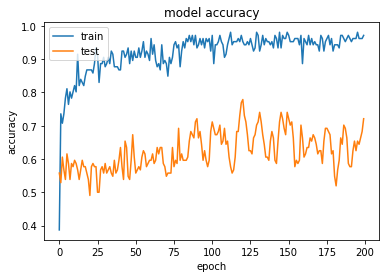

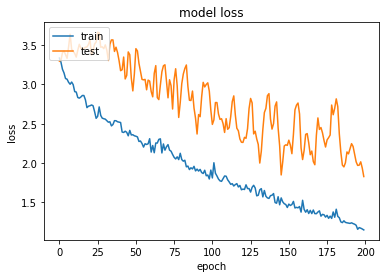

In [175]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

|모델|규제|정확도|
|:---|:---|:---|
|LSTM(256)+LSTM(512)+LSTM(64)+LSTM(32), batch_size=64|Dropout=0.5, recurrent_droput=0.5, L2|82.7%|


L2 규제를 추가하며 overfitting이 개선 된 것으로 보인다. 

# 2. GRU Best Model

In [176]:
from tensorflow.keras.layers import GRU

modelgg = Sequential()
modelgg.add(GRU(256, input_shape=(seq_len, 4),dropout=0.5, recurrent_dropout=0.5 ,
                kernel_regularizer=l1(0.01), bias_regularizer=l1(0.01),
                return_sequences=True))
modelgg.add(GRU(64,dropout=0.5, recurrent_dropout=0.5 ))

modelgg.add(Dense(1,activation='sigmoid'))

In [179]:
adam = Adam(lr=0.001)
chkk = ModelCheckpoint('best_modelgg.pkl', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
modelgg.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history=modelgg.fit(train, train_target, epochs=200, batch_size=64, callbacks=[chkk], validation_data=(validation,validation_target))

Epoch 1/200
2/2 [==============================] - ETA: 0s - loss: 0.4698 - accuracy: 0.8302
Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to best_modelgg.pkl
INFO:tensorflow:Assets written to: best_modelgg.pkl/assets
2/2 [==============================] - 3s 2s/step - loss: 0.4698 - accuracy: 0.8302 - val_loss: 1.6993 - val_accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - ETA: 0s - loss: 0.5166 - accuracy: 0.7736
Epoch 00002: val_accuracy improved from 0.50000 to 0.57692, saving model to best_modelgg.pkl
INFO:tensorflow:Assets written to: best_modelgg.pkl/assets
2/2 [==============================] - 3s 2s/step - loss: 0.5166 - accuracy: 0.7736 - val_loss: 1.4057 - val_accuracy: 0.5769
Epoch 3/200
2/2 [==============================] - ETA: 0s - loss: 0.4716 - accuracy: 0.7925
Epoch 00003: val_accuracy improved from 0.57692 to 0.58654, saving model to best_modelgg.pkl
INFO:tensorflow:Assets written to: best_modelgg.pkl/assets
2/2 [===========

2/2 [==============================] - ETA: 0s - loss: 0.3629 - accuracy: 0.8962
Epoch 00029: val_accuracy did not improve from 0.59615
2/2 [==============================] - 0s 90ms/step - loss: 0.3629 - accuracy: 0.8962 - val_loss: 1.3439 - val_accuracy: 0.5481
Epoch 30/200
2/2 [==============================] - ETA: 0s - loss: 0.4059 - accuracy: 0.8679
Epoch 00030: val_accuracy did not improve from 0.59615
2/2 [==============================] - 0s 98ms/step - loss: 0.4059 - accuracy: 0.8679 - val_loss: 1.3228 - val_accuracy: 0.5577
Epoch 31/200
2/2 [==============================] - ETA: 0s - loss: 0.3312 - accuracy: 0.8868
Epoch 00031: val_accuracy did not improve from 0.59615
2/2 [==============================] - 0s 91ms/step - loss: 0.3312 - accuracy: 0.8868 - val_loss: 1.4210 - val_accuracy: 0.5577
Epoch 32/200
2/2 [==============================] - ETA: 0s - loss: 0.3616 - accuracy: 0.8679
Epoch 00032: val_accuracy did not improve from 0.59615
2/2 [============================

Epoch 59/200
2/2 [==============================] - ETA: 0s - loss: 0.3434 - accuracy: 0.8868
Epoch 00059: val_accuracy did not improve from 0.59615
2/2 [==============================] - 0s 104ms/step - loss: 0.3434 - accuracy: 0.8868 - val_loss: 1.3836 - val_accuracy: 0.5577
Epoch 60/200
2/2 [==============================] - ETA: 0s - loss: 0.3269 - accuracy: 0.9057
Epoch 00060: val_accuracy did not improve from 0.59615
2/2 [==============================] - 0s 92ms/step - loss: 0.3269 - accuracy: 0.9057 - val_loss: 1.3143 - val_accuracy: 0.5769
Epoch 61/200
2/2 [==============================] - ETA: 0s - loss: 0.3996 - accuracy: 0.8396
Epoch 00061: val_accuracy did not improve from 0.59615
2/2 [==============================] - 0s 92ms/step - loss: 0.3996 - accuracy: 0.8396 - val_loss: 1.2643 - val_accuracy: 0.5865
Epoch 62/200
2/2 [==============================] - ETA: 0s - loss: 0.3616 - accuracy: 0.8962
Epoch 00062: val_accuracy did not improve from 0.59615
2/2 [==============

2/2 [==============================] - ETA: 0s - loss: 0.3610 - accuracy: 0.8679
Epoch 00088: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 92ms/step - loss: 0.3610 - accuracy: 0.8679 - val_loss: 1.4184 - val_accuracy: 0.5673
Epoch 89/200
2/2 [==============================] - ETA: 0s - loss: 0.3074 - accuracy: 0.9151
Epoch 00089: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 91ms/step - loss: 0.3074 - accuracy: 0.9151 - val_loss: 1.4524 - val_accuracy: 0.5481
Epoch 90/200
2/2 [==============================] - ETA: 0s - loss: 0.3466 - accuracy: 0.8962
Epoch 00090: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 92ms/step - loss: 0.3466 - accuracy: 0.8962 - val_loss: 1.4398 - val_accuracy: 0.5577
Epoch 91/200
2/2 [==============================] - ETA: 0s - loss: 0.3693 - accuracy: 0.8774
Epoch 00091: val_accuracy did not improve from 0.63462
2/2 [============================

Epoch 118/200
2/2 [==============================] - ETA: 0s - loss: 0.2878 - accuracy: 0.9151
Epoch 00118: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 92ms/step - loss: 0.2878 - accuracy: 0.9151 - val_loss: 1.7537 - val_accuracy: 0.5769
Epoch 119/200
2/2 [==============================] - ETA: 0s - loss: 0.2933 - accuracy: 0.9245
Epoch 00119: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 92ms/step - loss: 0.2933 - accuracy: 0.9245 - val_loss: 1.7820 - val_accuracy: 0.5673
Epoch 120/200
2/2 [==============================] - ETA: 0s - loss: 0.3100 - accuracy: 0.8962
Epoch 00120: val_accuracy did not improve from 0.63462
2/2 [==============================] - 0s 93ms/step - loss: 0.3100 - accuracy: 0.8962 - val_loss: 1.3474 - val_accuracy: 0.5769
Epoch 121/200
2/2 [==============================] - ETA: 0s - loss: 0.3912 - accuracy: 0.8585
Epoch 00121: val_accuracy did not improve from 0.63462
2/2 [===========

2/2 [==============================] - ETA: 0s - loss: 0.3156 - accuracy: 0.8962
Epoch 00147: val_accuracy did not improve from 0.65385
2/2 [==============================] - 0s 91ms/step - loss: 0.3156 - accuracy: 0.8962 - val_loss: 1.5433 - val_accuracy: 0.5865
Epoch 148/200
2/2 [==============================] - ETA: 0s - loss: 0.2312 - accuracy: 0.9528
Epoch 00148: val_accuracy did not improve from 0.65385
2/2 [==============================] - 0s 94ms/step - loss: 0.2312 - accuracy: 0.9528 - val_loss: 1.8308 - val_accuracy: 0.5673
Epoch 149/200
2/2 [==============================] - ETA: 0s - loss: 0.3987 - accuracy: 0.8679
Epoch 00149: val_accuracy did not improve from 0.65385
2/2 [==============================] - 0s 94ms/step - loss: 0.3987 - accuracy: 0.8679 - val_loss: 1.8257 - val_accuracy: 0.5769
Epoch 150/200
2/2 [==============================] - ETA: 0s - loss: 0.2700 - accuracy: 0.9151
Epoch 00150: val_accuracy did not improve from 0.65385
2/2 [=========================

Epoch 177/200
2/2 [==============================] - ETA: 0s - loss: 0.2604 - accuracy: 0.9245
Epoch 00177: val_accuracy did not improve from 0.65385
2/2 [==============================] - 0s 93ms/step - loss: 0.2604 - accuracy: 0.9245 - val_loss: 1.4769 - val_accuracy: 0.5577
Epoch 178/200
2/2 [==============================] - ETA: 0s - loss: 0.2944 - accuracy: 0.9151
Epoch 00178: val_accuracy did not improve from 0.65385
2/2 [==============================] - 0s 91ms/step - loss: 0.2944 - accuracy: 0.9151 - val_loss: 1.7634 - val_accuracy: 0.5385
Epoch 179/200
2/2 [==============================] - ETA: 0s - loss: 0.2583 - accuracy: 0.9340
Epoch 00179: val_accuracy did not improve from 0.65385
2/2 [==============================] - 0s 90ms/step - loss: 0.2583 - accuracy: 0.9340 - val_loss: 1.9525 - val_accuracy: 0.5673
Epoch 180/200
2/2 [==============================] - ETA: 0s - loss: 0.2645 - accuracy: 0.9245
Epoch 00180: val_accuracy did not improve from 0.65385
2/2 [===========

In [180]:
model = load_model('best_modelgg.pkl')

from sklearn.metrics import accuracy_score
test_preds = model.predict_classes(test)
accuracy_score(test_target, test_preds)

0.6634615384615384

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


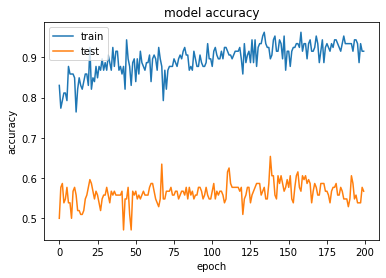

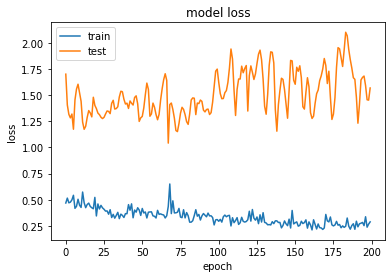

In [181]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

|모델|규제|정확도|
|:---|:---|:---|
|GRU(256))+GRU(64), batch_size=64|Dropout=0.5, recurrent_droput=0.5, L1|66.3%|


L2 규제를 추가하여도 overfitting 문제는 해결되지 않았고 정확도가 7% 가량 떨어졌다.

# 최종모델 및 결과

**최종모델은 다음과 같다.**

|모델|규제|정확도|
|:---|:---|:---|
|LSTM(256)+LSTM(512)+LSTM(64)+LSTM(32), batch_size=64|Dropout=0.5, recurrent_droput=0.5, L2|82.7%|

정확도는 약 83%로 낮지만 적은 양의 데이터에서 과대적합과 성능 사이 트레이드 오프를 최대한 해결하려고 노력하였으며 추후 앙상블 모델을 적합 시키면 더 좋은 결과를 얻을 것으로 생각된다. 